In [5]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""
%load_ext autoreload
%autoreload 2

# pylint: disable=invalid-name

In [11]:
import sys
import os
import logging
import gym
import pickle as pkl

import cyberbattle
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
log_dir = "/root/data/cyberbattle/logs/notebook_benchmark-toyctf"
reload = True


In [7]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [8]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10


In [8]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [22]:
debugging = True
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    print(fe_example.encode_at(a, 0))

port_count = 7, property_count = 10
1


In [21]:
if reload: pass
else:
    # Evaluate a random agent that opportunistically exploits
    # credentials gathere in its local cache
    credlookup_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=rca.CredentialCacheExploiter(),
        episode_count=10,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_exponential_decay=10000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Normal,
        title="Credential lookups (ϵ-greedy)"
    )

In [8]:
if reload: pass
else:
    # Evaluate a Tabular Q-learning agent
    tabularq_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=tqa.QTabularLearner(
            ep,
            gamma=0.015, learning_rate=0.01, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Normal,
        render=False,
        plot_episodes_length=False,
        title="Tabular Q-learning"
    )

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 61|reward:  112.0|last_reward_at:   61|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1506 err=121.00Q=-1.00] Qattack[state=3268 err=121.00 Q=-1.00] 
    + t=11 explore r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  Qsource[state=131 err=121.00Q=-1.00] Qattack[state=2624 err=121.00 Q=-1.00] 
    + t=33 explore r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  Qsource[state=84 err=121.

Episode 1|Iteration 92|reward:  226.0|last_reward_at:   74|Elapsed Time: 0:00:00||

    + t=73 explore r=100.0 cum_reward:212.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=15, Q_attack_state=3918)-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  Qsource[state=1851 err=9999.99Q=-1.00] Qattack[state=3918 err=10001.50 Q=-1.00] 
    + t=74 exploit-1->explore r=14.0 cum_reward:226.0 a=ChosenActionMetadata(Q_source_state=3721, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=5445)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  Qsource[state=3721 err=196.00Q=-1.00] Qattack[state=5445 err=196.00 Q=-1.00] 


Episode 1|Iteration 336|reward:  237.0|last_reward_at:  308|Elapsed Time: 0:00:01||

    + t=308 explore r=11.0 cum_reward:237.0 a=ChosenActionMetadata(Q_source_state=2143, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=6, Q_attack_state=3146)-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=3  Qsource[state=2143 err=121.00Q=-1.00] Qattack[state=3146 err=121.00 Q=-1.00] 


Episode 1|Iteration 467|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:02||

    + t=421 explore r=14.0 cum_reward:251.0 a=ChosenActionMetadata(Q_source_state=2143, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=10, Q_attack_state=2766)-{'remote_vulnerability': array([1, 6, 7], dtype=int32)} creds=4  Qsource[state=2143 err=195.99Q=-1.00] Qattack[state=2766 err=196.00 Q=-1.00] 
    + t=432 explore r=11.0 cum_reward:262.0 a=ChosenActionMetadata(Q_source_state=4437, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=1464)-{'remote_vulnerability': array([0, 7, 2], dtype=int32)} creds=4  Qsource[state=4437 err=121.00Q=-1.00] Qattack[state=1464 err=121.00 Q=-1.00] 
    + t=446 exploit r=50.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=4437, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=12, Q_attack_state=4966)-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  Qsource[state=44

Episode 1|Iteration 1500|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:06||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/101 (0.02)
    explore-remote: 8/537 (0.01)
    explore-connect: 1/544 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/305 (0.01)
  exploit deflected to exploration: 4
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 19|reward:   97.0|last_reward_at:   19|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1506 err=118.63Q=-1.00] Qattack[state=3268 err=118.63 Q=-1.00] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.11, Q_attack_expectedq=0.11, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=118.63Q=0.11] Qattack[state=2624 err=118.63 Q=0.11] 
    + t=11 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.1026359786672162, Q_attack_expectedq=0.1026359786672162, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0, 1, 6])} creds=0  Qsource[state=84 e

Episode 2|Iteration 92|reward:  114.0|last_reward_at:   69|Elapsed Time: 0:00:00||

    + t=66 explore r=6.0 cum_reward:103.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=3918)-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=1  Qsource[state=2392 err=36.00Q=-1.00] Qattack[state=3918 err=36.18 Q=-1.00] 
    + t=69 explore r=11.0 cum_reward:114.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=6, Q_attack_state=3918)-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=1  Qsource[state=2392 err=119.74Q=-1.00] Qattack[state=3918 err=121.03 Q=-1.00] 


Episode 2|Iteration 247|reward:  123.0|last_reward_at:  196|Elapsed Time: 0:00:01||

    + t=196 explore r=9.0 cum_reward:123.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=3146)-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  Qsource[state=2392 err=80.12Q=-1.00] Qattack[state=3146 err=81.02 Q=-1.00] 


Episode 2|Iteration 380|reward:  198.0|last_reward_at:  349|Elapsed Time: 0:00:01||

    + t=344 explore r=14.0 cum_reward:137.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=10, Q_attack_state=3146)-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=3  Qsource[state=1851 err=183.94Q=-1.00] Qattack[state=3146 err=196.00 Q=-1.00] 
    + t=346 exploit r=50.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=5512)-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  Qsource[state=1851 err=2442.93Q=-1.00] Qattack[state=5512 err=2500.00 Q=-1.00] 
    + t=349 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=5, Q_attack_state=631)-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  Qsource[state=2

Episode 2|Iteration 1174|reward:  298.0|last_reward_at: 1146|Elapsed Time: 0:00:04||

    + t=1146 explore r=100.0 cum_reward:298.0 a=ChosenActionMetadata(Q_source_state=4768, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=15, Q_attack_state=1464)-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=3  Qsource[state=4768 err=10000.00Q=-1.00] Qattack[state=1464 err=10000.26 Q=-1.00] 


Episode 2|Iteration 1233|reward:  312.0|last_reward_at: 1193|Elapsed Time: 0:00:05||

    + t=1193 explore r=14.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=4768, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=940)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=4768 err=195.95Q=-1.00] Qattack[state=940 err=196.19 Q=-1.00] 


Episode 2|Iteration 1500|reward:  312.0|last_reward_at: 1193|Elapsed Time: 0:00:06||


  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/71 (0.03)
    explore-remote: 5/455 (0.01)
    explore-connect: 1/393 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/43 (0.07)
    exploit-connect: 2/525 (0.00)
  exploit deflected to exploration: 44
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 45|reward:  128.0|last_reward_at:   45|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=3061 err=121.07Q=-1.00] Qattack[state=3268 err=116.30 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.2189165, Q_attack_expectedq=0.2189165, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=116.30Q=0.22] Qattack[state=2624 err=116.30 Q=0.22] 
    + t=6 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.20543105008756884, Q_attack_expectedq=0.20543105008756884, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0, 1, 6])} creds=0  Qsource

Episode 3|Iteration 47|reward:  178.0|last_reward_at:   47|Elapsed Time: 0:00:00||

    + t=47 exploit r=50.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=12, Q_attack_state=3460)-{'connect': array([4, 6, 1, 1], dtype=int32)} creds=2  Qsource[state=2392 err=2494.87Q=-1.00] Qattack[state=3460 err=2500.00 Q=-1.00] 


Episode 3|Iteration 156|reward:  198.0|last_reward_at:  156|Elapsed Time: 0:00:00||

    + t=109 exploit-1->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5512)-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=3  Qsource[state=2735 err=81.03Q=-1.00] Qattack[state=5512 err=81.13 Q=-1.00] 
    + t=156 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=5, Q_attack_state=3460)-{'remote_vulnerability': array([4, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=121.23Q=-1.00] Qattack[state=3460 err=121.00 Q=-1.00] 


Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  156|Elapsed Time: 0:00:06||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 4/296 (0.01)
    explore-connect: 0/336 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 2/809 (0.00)
  exploit deflected to exploration: 42
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 57|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||

    + t=2 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=0.2189165, Q_attack_expectedq=0.2189165, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1506 err=116.34Q=0.22] Qattack[state=3268 err=114.02 Q=0.22] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.3267590784678321, Q_attack_expectedq=0.3267590784678321, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=114.02Q=0.33] Qattack[state=2624 err=114.02 Q=0.33] 
    + t=6 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.3072670568972942, Q_attack_expectedq=0.3072670568972942, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0, 1, 6])} c

Episode 4|Iteration 95|reward:  172.0|last_reward_at:   84|Elapsed Time: 0:00:00||

    + t=66 explore r=11.0 cum_reward:108.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=6, Q_attack_state=5368)-{'remote_vulnerability': array([4, 3, 3], dtype=int32)} creds=1  Qsource[state=2392 err=113.55Q=-1.00] Qattack[state=5368 err=121.00 Q=-1.00] 
    + t=83 exploit[invalid]->explore r=14.0 cum_reward:122.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=10, Q_attack_state=28)-{'remote_vulnerability': array([4, 5, 7], dtype=int32)} creds=2  Qsource[state=2392 err=184.99Q=-1.00] Qattack[state=28 err=196.21 Q=-1.00] 
    + t=84 exploit r=50.0 cum_reward:172.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=5512)-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  Qso

Episode 4|Iteration 224|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:01||

    + t=195 exploit[undefined]->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=631)-{'remote_vulnerability': array([6, 4, 0], dtype=int32)} creds=2  Qsource[state=2735 err=36.00Q=-1.00] Qattack[state=631 err=36.02 Q=-1.00] 


Episode 4|Iteration 369|reward:  198.0|last_reward_at:  369|Elapsed Time: 0:00:01||

    + t=325 exploit[undefined]->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=631)-{'remote_vulnerability': array([6, 3, 4], dtype=int32)} creds=3  Qsource[state=2735 err=80.60Q=-1.00] Qattack[state=631 err=81.01 Q=-1.00] 
    + t=369 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=5, Q_attack_state=3460)-{'remote_vulnerability': array([4, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=118.84Q=-1.00] Qattack[state=3460 err=118.66 Q=-1.00] 


Episode 4|Iteration 1500|reward:  198.0|last_reward_at:  369|Elapsed Time: 0:00:06||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/36 (0.00)
    explore-remote: 5/286 (0.02)
    explore-connect: 0/254 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/119 (0.02)
    exploit-connect: 2/794 (0.00)
  exploit deflected to exploration: 80
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 21|reward:  108.0|last_reward_at:   21|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.10898151822525001, Q_attack_expectedq=0.10898151822525001, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=118.76Q=0.11] Qattack[state=3268 err=111.79 Q=0.11] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.4292681450913437, Q_attack_expectedq=0.4292681450913437, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=111.87Q=0.43] Qattack[state=2624 err=111.79 Q=0.43] 
    + t=4 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.41424721271618603, Q_attack_expectedq=0.41424721271618603, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability

Episode 5|Iteration 114|reward:  123.0|last_reward_at:   63|Elapsed Time: 0:00:00||

    + t=50 exploit[undefined]->explore r=9.0 cum_reward:117.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=512, abstract_action=7, Q_attack_state=5368)-{'remote_vulnerability': array([5, 3, 4], dtype=int32)} creds=2  Qsource[state=2392 err=73.09Q=-1.00] Qattack[state=5368 err=81.03 Q=-1.00] 
    + t=63 explore r=6.0 cum_reward:123.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=512, abstract_action=3, Q_attack_state=5368)-{'remote_vulnerability': array([5, 5, 0], dtype=int32)} creds=2  Qsource[state=1851 err=35.78Q=-1.00] Qattack[state=5368 err=35.08 Q=-1.00] 


Episode 5|Iteration 969|reward:  187.0|last_reward_at:  923|Elapsed Time: 0:00:03||

    + t=918 explore r=14.0 cum_reward:137.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=512, abstract_action=10, Q_attack_state=5368)-{'remote_vulnerability': array([5, 4, 7], dtype=int32)} creds=3  Qsource[state=1851 err=195.94Q=-1.00] Qattack[state=5368 err=196.05 Q=-1.00] 
    + t=923 exploit r=50.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=512, abstract_action=12, Q_attack_state=28)-{'connect': array([5, 6, 1, 2], dtype=int32)} creds=3  Qsource[state=1851 err=2486.39Q=-1.00] Qattack[state=28 err=2500.21 Q=-1.00] 


Episode 5|Iteration 1215|reward:  198.0|last_reward_at: 1174|Elapsed Time: 0:00:04||

    + t=1174 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=5512)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=121.00Q=-1.00] Qattack[state=5512 err=121.22 Q=-1.00] 


Episode 5|Iteration 1500|reward:  198.0|last_reward_at: 1174|Elapsed Time: 0:00:05||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/33 (0.00)
    explore-remote: 6/166 (0.03)
    explore-connect: 0/161 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 2/1128 (0.00)
  exploit deflected to exploration: 32
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 36|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.21795673381789396, Q_attack_expectedq=0.21795673381789396, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=116.43Q=0.22] Qattack[state=3268 err=109.60 Q=0.22] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.5350376007223376, Q_attack_expectedq=0.5350376007223376, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=109.68Q=0.54] Qattack[state=2624 err=109.59 Q=0.54] 
    + t=10 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.48535392282525536, Q_attack_expectedq=0.48535392282525536, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerabilit

Episode 6|Iteration 247|reward:  117.0|last_reward_at:  202|Elapsed Time: 0:00:01||

    + t=190 exploit r=11.0 cum_reward:108.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=0.1650167100716793, Q_attack_expectedq=0.1650167100716793, source_node=4, source_node_encoding=512, abstract_action=6, Q_attack_state=5368)-{'remote_vulnerability': array([4, 3, 3])} creds=1  Qsource[state=2392 err=117.45Q=0.17] Qattack[state=5368 err=119.04 Q=0.17] 
    + t=202 exploit[undefined]->explore r=9.0 cum_reward:117.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=7, Q_attack_state=28)-{'remote_vulnerability': array([4, 3, 4], dtype=int32)} creds=2  Qsource[state=2392 err=77.02Q=-1.00] Qattack[state=28 err=81.12 Q=-1.00] 


Episode 6|Iteration 790|reward:  295.0|last_reward_at:  765|Elapsed Time: 0:00:03||

    + t=754 explore r=100.0 cum_reward:217.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=15, Q_attack_state=28)-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=2  Qsource[state=1851 err=9990.88Q=-1.00] Qattack[state=28 err=10001.25 Q=-1.00] 
    + t=756 exploit[undefined]->explore r=14.0 cum_reward:231.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=10, Q_attack_state=28)-{'remote_vulnerability': array([4, 5, 7], dtype=int32)} creds=3  Qsource[state=1851 err=168.48Q=-1.00] Qattack[state=28 err=192.51 Q=-1.00] 
    + t=757 exploit r=50.0 cum_reward:281.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=12, Q_attack_state=2766)-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=3  Qsourc

Episode 6|Iteration 1500|reward:  295.0|last_reward_at:  765|Elapsed Time: 0:00:06||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 2/160 (0.01)
    explore-connect: 1/186 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/77 (0.05)
    exploit-connect: 2/1045 (0.00)
  exploit deflected to exploration: 87
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 32|reward:  181.0|last_reward_at:   32|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.3258574221198234, Q_attack_expectedq=0.3258574221198234, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=114.14Q=0.33] Qattack[state=3268 err=107.45 Q=0.33] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.6397652513470089, Q_attack_expectedq=0.6397652513470089, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=107.52Q=0.64] Qattack[state=2624 err=107.44 Q=0.64] 
    + t=4 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.5847748859706534, Q_attack_expectedq=0.5847748859706534, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': a

Episode 7|Iteration 798|reward:  192.0|last_reward_at:  757|Elapsed Time: 0:00:03||

    + t=757 explore r=11.0 cum_reward:192.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=5, Q_attack_state=3460)-{'remote_vulnerability': array([4, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=120.93Q=-1.00] Qattack[state=3460 err=116.43 Q=-1.00] 


Episode 7|Iteration 1500|reward:  192.0|last_reward_at:  757|Elapsed Time: 0:00:06||


  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 2/104 (0.02)
    explore-connect: 0/98 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/6 (0.45)
    exploit-connect: 2/1270 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 33|reward:  108.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.4326948126863272, Q_attack_expectedq=0.4326948126863272, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=111.90Q=0.43] Qattack[state=3268 err=105.34 Q=0.43] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.7434561876664385, Q_attack_expectedq=0.7434561876664385, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=105.41Q=0.74] Qattack[state=2624 err=105.33 Q=0.74] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.689039098822206, Q_attack_expectedq=0.689039098822206, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': arr

Episode 8|Iteration 71|reward:  114.0|last_reward_at:   58|Elapsed Time: 0:00:00||

    + t=58 explore r=6.0 cum_reward:114.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=3146)-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=1  Qsource[state=2392 err=33.64Q=-1.00] Qattack[state=3146 err=36.06 Q=-1.00] 


Episode 8|Iteration 190|reward:  187.0|last_reward_at:  144|Elapsed Time: 0:00:00||

    + t=140 exploit r=14.0 cum_reward:128.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=0.17439552867756203, Q_attack_expectedq=0.17439552867756203, source_node=0, source_node_encoding=0, abstract_action=10, Q_attack_state=3146)-{'remote_vulnerability': array([0, 5, 7])} creds=2  Qsource[state=2392 err=191.22Q=0.17] Qattack[state=3146 err=185.88 Q=0.17] 
    + t=141 exploit r=50.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=5512)-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  Qsource[state=2392 err=2469.13Q=-1.00] Qattack[state=5512 err=2459.75 Q=-1.00] 
    + t=144 exploit r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=0.19651922425346932, Q_attack_expectedq=0.19651922425346932, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=631)-{'remote_vulnerability': arr

Episode 8|Iteration 380|reward:  198.0|last_reward_at:  334|Elapsed Time: 0:00:01||

    + t=334 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=5512)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=120.97Q=-1.00] Qattack[state=5512 err=118.67 Q=-1.00] 


Episode 8|Iteration 725|reward:  312.0|last_reward_at:  725|Elapsed Time: 0:00:03||

    + t=697 explore r=100.0 cum_reward:298.0 a=ChosenActionMetadata(Q_source_state=4768, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=15, Q_attack_state=5280)-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  Qsource[state=4768 err=10000.00Q=-1.00] Qattack[state=5280 err=10000.00 Q=-1.00] 
    + t=725 explore r=14.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=4768, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=940)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=4768 err=192.29Q=-1.00] Qattack[state=940 err=192.42 Q=-1.00] 


Episode 8|Iteration 1500|reward:  312.0|last_reward_at:  725|Elapsed Time: 0:00:06||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 2/136 (0.01)
    explore-connect: 1/136 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1187 (0.00)
  exploit deflected to exploration: 139
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 33|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.5384793829876139, Q_attack_expectedq=0.5384793829876139, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=109.71Q=0.54] Qattack[state=3268 err=103.28 Q=0.54] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.8461249816545975, Q_attack_expectedq=0.8461249816545975, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=103.34Q=0.85] Qattack[state=2624 err=103.26 Q=0.85] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.7922784322361182, Q_attack_expectedq=0.7922784322361182, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': a

Episode 9|Iteration 95|reward:  106.0|last_reward_at:   52|Elapsed Time: 0:00:00||

    + t=52 exploit[undefined]->explore r=9.0 cum_reward:106.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=3918)-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  Qsource[state=2392 err=73.22Q=-1.00] Qattack[state=3918 err=81.43 Q=-1.00] 


Episode 9|Iteration 1500|reward:  106.0|last_reward_at:   52|Elapsed Time: 0:00:05||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/73 (0.01)
    explore-connect: 0/58 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 1/1353 (0.00)
  exploit deflected to exploration: 39
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 32|reward:  106.0|last_reward_at:   19|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.6432215079049859, Q_attack_expectedq=0.6432215079049859, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=107.56Q=0.64] Qattack[state=3268 err=101.25 Q=0.64] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=0.9477825736028869, Q_attack_expectedq=0.9477825736028869, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=101.32Q=0.95] Qattack[state=2624 err=101.24 Q=0.95] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.8945051409145881, Q_attack_expectedq=0.8945051409145881, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': a

Episode 10|Iteration 247|reward:  112.0|last_reward_at:  214|Elapsed Time: 0:00:00||

    + t=214 explore r=6.0 cum_reward:112.0 a=ChosenActionMetadata(Q_source_state=1851, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=3918)-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  Qsource[state=1851 err=36.00Q=-1.00] Qattack[state=3918 err=35.66 Q=-1.00] 


Episode 10|Iteration 1500|reward:  112.0|last_reward_at:  214|Elapsed Time: 0:00:05||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 2/41 (0.05)
    explore-connect: 0/47 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 1/1397 (0.00)
  exploit deflected to exploration: 12
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 28|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.7469314602119764, Q_attack_expectedq=0.7469314602119764, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=105.45Q=0.75] Qattack[state=3268 err=99.27 Q=0.75] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.0484389236379952, Q_attack_expectedq=1.0484389236379952, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=99.33Q=1.05] Qattack[state=2624 err=99.25 Q=1.05] 
    + t=4 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=0.9859183591219066, Q_attack_expectedq=0.9859183591219066, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': arra

Episode 11|Iteration 152|reward:  106.0|last_reward_at:   94|Elapsed Time: 0:00:00||

    + t=94 exploit[undefined]->explore r=9.0 cum_reward:106.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=7, Q_attack_state=5368)-{'remote_vulnerability': array([4, 3, 4], dtype=int32)} creds=2  Qsource[state=2392 err=79.40Q=-1.00] Qattack[state=5368 err=79.68 Q=-1.00] 


Episode 11|Iteration 1500|reward:  106.0|last_reward_at:   94|Elapsed Time: 0:00:05||


  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 1/63 (0.02)
    explore-connect: 0/70 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 1/1345 (0.00)
  exploit deflected to exploration: 82
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 35|reward:  117.0|last_reward_at:   35|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.8496194114484024, Q_attack_expectedq=0.8496194114484024, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=103.38Q=0.85] Qattack[state=3268 err=97.32 Q=0.85] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.1481038933410368, Q_attack_expectedq=1.1481038933410368, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=97.38Q=1.15] Qattack[state=2624 err=97.31 Q=1.15] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.0862431528439613, Q_attack_expectedq=1.0862431528439613, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': arra

Episode 12|Iteration 1500|reward:  117.0|last_reward_at:   35|Elapsed Time: 0:00:05||


  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/37 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/6 (0.40)
    exploit-connect: 1/1413 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 34|reward:  108.0|last_reward_at:   15|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=0.9512954329179195, Q_attack_expectedq=0.9512954329179195, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=101.35Q=0.95] Qattack[state=3268 err=95.41 Q=0.95] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.246785790880553, Q_attack_expectedq=1.246785790880553, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=95.47Q=1.25] Qattack[state=2624 err=95.40 Q=1.25] 
    + t=5 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.1623429798232916, Q_attack_expectedq=1.1623429798232916, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array(

Episode 13|Iteration 95|reward:  181.0|last_reward_at:   73|Elapsed Time: 0:00:00||

    + t=55 exploit r=14.0 cum_reward:122.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=0.1961156278886356, Q_attack_expectedq=0.1961156278886356, source_node=4, source_node_encoding=512, abstract_action=10, Q_attack_state=28)-{'remote_vulnerability': array([4, 5, 7])} creds=2  Qsource[state=2392 err=190.63Q=0.20] Qattack[state=28 err=189.38 Q=0.20] 
    + t=56 exploit r=50.0 cum_reward:172.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=12, Q_attack_state=3460)-{'connect': array([4, 6, 1, 1], dtype=int32)} creds=2  Qsource[state=2392 err=2467.12Q=-1.00] Qattack[state=3460 err=2405.70 Q=-1.00] 
    + t=73 exploit r=9.0 cum_reward:181.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=0.2453079773713362, Q_attack_expectedq=0.2453079773713362, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=631)-{'remote_vulnerability': array([6, 

Episode 13|Iteration 437|reward:  187.0|last_reward_at:  381|Elapsed Time: 0:00:01||

    + t=381 explore r=6.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=5512)-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=3  Qsource[state=2351 err=35.54Q=-1.00] Qattack[state=5512 err=36.16 Q=-1.00] 


Episode 13|Iteration 1083|reward:  198.0|last_reward_at: 1033|Elapsed Time: 0:00:04||

    + t=1033 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=5512)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=120.94Q=-1.00] Qattack[state=5512 err=116.31 Q=-1.00] 


Episode 13|Iteration 1500|reward:  198.0|last_reward_at: 1033|Elapsed Time: 0:00:05||


  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 2/39 (0.05)
    explore-connect: 0/35 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/26 (0.19)
    exploit-connect: 2/1381 (0.00)
  exploit deflected to exploration: 34
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 38|reward:  181.0|last_reward_at:   27|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.0519694964573725, Q_attack_expectedq=1.0519694964573725, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=99.36Q=1.05] Qattack[state=3268 err=93.54 Q=1.05] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.3444957705650615, Q_attack_expectedq=1.3444957705650615, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=93.59Q=1.34] Qattack[state=2624 err=93.52 Q=1.34] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.2609340476602928, Q_attack_expectedq=1.2609340476602928, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array

Episode 14|Iteration 171|reward:  192.0|last_reward_at:  131|Elapsed Time: 0:00:00||

    + t=131 explore r=11.0 cum_reward:192.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=5, Q_attack_state=631)-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  Qsource[state=2351 err=121.04Q=-1.00] Qattack[state=631 err=120.12 Q=-1.00] 


Episode 14|Iteration 1500|reward:  192.0|last_reward_at:  131|Elapsed Time: 0:00:05||


  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/21 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/17 (0.26)
    exploit-connect: 2/1430 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 26|reward:  181.0|last_reward_at:   26|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.1516514758583836, Q_attack_expectedq=1.1516514758583836, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=97.42Q=1.15] Qattack[state=3268 err=91.71 Q=1.15] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.44123995296656, Q_attack_expectedq=1.44123995296656, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=91.76Q=1.44] Qattack[state=2624 err=91.69 Q=1.44] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.3585540141365888, Q_attack_expectedq=1.3585540141365888, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0,

Episode 15|Iteration 1500|reward:  181.0|last_reward_at:   26|Elapsed Time: 0:00:05||


  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/13 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/17 (0.26)
    exploit-connect: 2/1443 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 38|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.2503511470927446, Q_attack_expectedq=1.2503511470927446, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=95.51Q=1.25] Qattack[state=3268 err=89.91 Q=1.25] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.537031336539015, Q_attack_expectedq=1.537031336539015, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=89.96Q=1.54] Qattack[state=2624 err=89.89 Q=1.54] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.4552166149973709, Q_attack_expectedq=1.4552166149973709, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 16|Iteration 1500|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:05||


  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/14 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1454 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 37|reward:  181.0|last_reward_at:   37|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.348078190322298, Q_attack_expectedq=1.348078190322298, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=93.63Q=1.35] Qattack[state=3268 err=88.15 Q=1.35] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.6318793056658745, Q_attack_expectedq=1.6318793056658745, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=88.20Q=1.63] Qattack[state=2624 err=88.13 Q=1.63] 
    + t=4 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.5356405466776322, Q_attack_expectedq=1.5356405466776322, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 17|Iteration 1500|reward:  181.0|last_reward_at:   37|Elapsed Time: 0:00:05||


  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/28 (0.18)
    exploit-connect: 2/1443 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 38|reward:  181.0|last_reward_at:   15|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.444842190314925, Q_attack_expectedq=1.444842190314925, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=91.80Q=1.44] Qattack[state=3268 err=86.42 Q=1.44] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.725793150171203, Q_attack_expectedq=1.725793150171203, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=86.47Q=1.73] Qattack[state=2624 err=86.40 Q=1.73] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.6305504901542602, Q_attack_expectedq=1.6305504901542602, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([0,

Episode 18|Iteration 209|reward:  187.0|last_reward_at:  178|Elapsed Time: 0:00:00||

    + t=178 explore r=6.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2351, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=4, source_node_encoding=512, abstract_action=3, Q_attack_state=3460)-{'remote_vulnerability': array([4, 4, 0], dtype=int32)} creds=3  Qsource[state=2351 err=36.00Q=-1.00] Qattack[state=3460 err=36.51 Q=-1.00] 


Episode 18|Iteration 1500|reward:  187.0|last_reward_at:  178|Elapsed Time: 0:00:05||


  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/6 (0.50)
    exploit-connect: 2/1459 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 28|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.5406526373843012, Q_attack_expectedq=1.5406526373843012, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=90.00Q=1.54] Qattack[state=3268 err=84.73 Q=1.54] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.818779801243014, Q_attack_expectedq=1.818779801243014, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=84.77Q=1.82] Qattack[state=2624 err=84.70 Q=1.82] 
    + t=5 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.6907188403804998, Q_attack_expectedq=1.6907188403804998, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 19|Iteration 1500|reward:  181.0|last_reward_at:   28|Elapsed Time: 0:00:05||


  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/4 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/19 (0.24)
    exploit-connect: 2/1457 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 57|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.6355189279806446, Q_attack_expectedq=1.6355189279806446, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=88.23Q=1.64] Qattack[state=3268 err=83.07 Q=1.64] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=1.9108506819293527, Q_attack_expectedq=1.9108506819293527, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=83.10Q=1.91] Qattack[state=2624 err=83.04 Q=1.91] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.7841096949137232, Q_attack_expectedq=1.7841096949137232, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array

Episode 20|Iteration 1500|reward:  181.0|last_reward_at:   23|Elapsed Time: 0:00:05||


  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/14 (0.30)
    exploit-connect: 2/1459 (0.00)
  exploit deflected to exploration: 0
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 42|reward:  108.0|last_reward_at:   42|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 1|Iteration 223|reward:  117.0|last_reward_at:  159|Elapsed Time: 0:00:00||

    + t=159 exploit-1->explore r=9.0 cum_reward:117.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=256, abstract_action=7, Q_attack_state=631)-{'remote_vulnerability': array([5, 3, 4], dtype=int32)} creds=2  Qsource[state=1630 err=81.00Q=-1.00] Qattack[state=631 err=68.64 Q=-1.00] 


Episode 1|Iteration 1500|reward:  117.0|last_reward_at:  159|Elapsed Time: 0:00:05||


  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 2/75 (0.03)
    explore-connect: 0/67 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 1/1341 (0.00)
  exploit deflected to exploration: 154
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 34|reward:  108.0|last_reward_at:   34|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=12 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array(

Episode 2|Iteration 114|reward:  117.0|last_reward_at:   57|Elapsed Time: 0:00:00||

    + t=57 exploit r=9.0 cum_reward:117.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=3.4053821892982925, Q_attack_expectedq=3.4053821892982925, source_node=5, source_node_encoding=512, abstract_action=7, Q_attack_state=5368)-{'remote_vulnerability': array([5, 3, 4])} creds=2  Qsource[state=2392 err=31.30Q=3.41] Qattack[state=5368 err=77.99 Q=3.41] 


Episode 2|Iteration 1500|reward:  117.0|last_reward_at:   57|Elapsed Time: 0:00:05||


  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/1 (0.50)
    exploit-remote: 4/35 (0.10)
    exploit-connect: 1/1443 (0.00)
  exploit deflected to exploration: 15
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 42|reward:  181.0|last_reward_at:   42|Elapsed Time: 0:00:00||

    + t=2 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=0.3267763488617702, Q_attack_expectedq=0.3267763488617702, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1506 err=113.92Q=0.33] Qattack[state=3268 err=80.90 Q=0.33] 
    + t=4 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=6 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array(

Episode 3|Iteration 1500|reward:  181.0|last_reward_at:   42|Elapsed Time: 0:00:05||


  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/1 (0.50)
    exploit-remote: 6/26 (0.19)
    exploit-connect: 2/1458 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 41|reward:  119.0|last_reward_at:   41|Elapsed Time: 0:00:00||

    + t=3 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=0.3267763488617702, Q_attack_expectedq=0.3267763488617702, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1506 err=113.92Q=0.33] Qattack[state=3268 err=80.90 Q=0.33] 
    + t=4 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=8 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array(

Episode 4|Iteration 247|reward:  128.0|last_reward_at:  185|Elapsed Time: 0:00:01||

    + t=185 exploit-1->explore r=9.0 cum_reward:128.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5512)-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  Qsource[state=1630 err=81.00Q=-1.00] Qattack[state=5512 err=79.60 Q=-1.00] 


Episode 4|Iteration 1500|reward:  128.0|last_reward_at:  185|Elapsed Time: 0:00:05||


  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 3/76 (0.04)
    explore-connect: 0/82 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/5 (0.38)
    exploit-connect: 1/1315 (0.00)
  exploit deflected to exploration: 175
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 57|reward:   53.0|last_reward_at:   26|Elapsed Time: 0:00:00||

    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1506, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1506 err=113.92Q=-1.00] Qattack[state=3268 err=80.90 Q=-1.00] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=8 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': arr

Episode 5|Iteration 1500|reward:   53.0|last_reward_at:   26|Elapsed Time: 0:00:04||


  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/4 (0.43)
    exploit-connect: 0/1474 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 38|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=5 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=9 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 6|Iteration 95|reward:  117.0|last_reward_at:   95|Elapsed Time: 0:00:00||

    + t=57 exploit[undefined]->explore r=14.0 cum_reward:58.0 a=ChosenActionMetadata(Q_source_state=2885, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=3918)-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  Qsource[state=2885 err=139.92Q=-1.00] Qattack[state=3918 err=192.62 Q=-1.00] 
    + t=58 exploit r=50.0 cum_reward:108.0 a=ChosenActionMetadata(Q_source_state=2066, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=3146)-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  Qsource[state=2066 err=1708.59Q=-1.00] Qattack[state=3146 err=2466.45 Q=-1.00] 
    + t=95 exploit r=9.0 cum_reward:117.0 a=ChosenActionMetadata(Q_source_state=2392, Q_source_expectedq=3.4053821892982925, Q_attack_expectedq=3.4053821892982925, source_node=5, source_node_encoding=512, abstract_action=7, Q_attack_state=5368)-{'remote_vulnerability': array([5

Episode 6|Iteration 1500|reward:  117.0|last_reward_at:   95|Elapsed Time: 0:00:05||


  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/3 (0.25)
    exploit-remote: 4/51 (0.07)
    exploit-connect: 1/1405 (0.00)
  exploit deflected to exploration: 35
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 57|reward:  181.0|last_reward_at:   14|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=3 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 7|Iteration 1500|reward:  181.0|last_reward_at:   14|Elapsed Time: 0:00:05||


  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/5 (0.55)
    exploit-connect: 2/1486 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 35|reward:  108.0|last_reward_at:   35|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=5 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 8|Iteration 114|reward:  128.0|last_reward_at:   67|Elapsed Time: 0:00:00||

    + t=66 exploit-1->explore r=11.0 cum_reward:119.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=256, abstract_action=5, Q_attack_state=631)-{'remote_vulnerability': array([5, 5, 2], dtype=int32)} creds=1  Qsource[state=1630 err=121.00Q=-1.00] Qattack[state=631 err=117.54 Q=-1.00] 
    + t=67 exploit-1->explore r=9.0 cum_reward:128.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=256, abstract_action=7, Q_attack_state=5280)-{'remote_vulnerability': array([5, 3, 4], dtype=int32)} creds=2  Qsource[state=1630 err=81.00Q=-1.00] Qattack[state=5280 err=81.00 Q=-1.00] 


Episode 8|Iteration 1500|reward:  128.0|last_reward_at:   67|Elapsed Time: 0:00:05||


  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 3/36 (0.08)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 1/1433 (0.00)
  exploit deflected to exploration: 60
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=1.7294503663031275, Q_attack_expectedq=1.7294503663031275, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=3061 err=85.94Q=1.73] Qattack[state=3268 err=80.90 Q=1.73] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=9 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': array([

Episode 9|Iteration 74|reward:  108.0|last_reward_at:   46|Elapsed Time: 0:00:00||

    + t=45 exploit[undefined]->explore r=14.0 cum_reward:58.0 a=ChosenActionMetadata(Q_source_state=2885, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=10, Q_attack_state=3918)-{'remote_vulnerability': array([0, 4, 7], dtype=int32)} creds=1  Qsource[state=2885 err=139.92Q=-1.00] Qattack[state=3918 err=195.92 Q=-1.00] 
    + t=46 exploit r=50.0 cum_reward:108.0 a=ChosenActionMetadata(Q_source_state=2066, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=3146)-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  Qsource[state=2066 err=1708.59Q=-1.00] Qattack[state=3146 err=2466.45 Q=-1.00] 


Episode 9|Iteration 151|reward:  172.0|last_reward_at:  135|Elapsed Time: 0:00:00||

    + t=134 exploit-1->explore r=14.0 cum_reward:122.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=256, abstract_action=4, Q_attack_state=631)-{'remote_vulnerability': array([5, 2, 1], dtype=int32)} creds=2  Qsource[state=1630 err=196.00Q=-1.00] Qattack[state=631 err=195.99 Q=-1.00] 
    + t=135 exploit r=50.0 cum_reward:172.0 a=ChosenActionMetadata(Q_source_state=1630, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=5512)-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  Qsource[state=1630 err=2500.00Q=-1.00] Qattack[state=5512 err=2319.56 Q=-1.00] 


Episode 9|Iteration 184|reward:  178.0|last_reward_at:  166|Elapsed Time: 0:00:01||

    + t=166 exploit[undefined]->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=5, source_node_encoding=256, abstract_action=3, Q_attack_state=5280)-{'remote_vulnerability': array([5, 6, 0], dtype=int32)} creds=2  Qsource[state=2735 err=27.42Q=-1.00] Qattack[state=5280 err=35.99 Q=-1.00] 


Episode 9|Iteration 494|reward:  187.0|last_reward_at:  431|Elapsed Time: 0:00:02||

    + t=431 exploit[undefined]->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=2735, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5512)-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=3  Qsource[state=2735 err=80.58Q=-1.00] Qattack[state=5512 err=79.60 Q=-1.00] 


Episode 9|Iteration 1500|reward:  187.0|last_reward_at:  431|Elapsed Time: 0:00:06||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/38 (0.00)
    explore-remote: 4/194 (0.02)
    explore-connect: 0/182 (0.00)
    exploit-local: 1/1 (0.50)
    exploit-remote: 3/6 (0.33)
    exploit-connect: 2/1069 (0.00)
  exploit deflected to exploration: 418
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 38|reward:  106.0|last_reward_at:   14|Elapsed Time: 0:00:00||

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=3061, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=3268)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=3061 err=85.94Q=-1.00] Qattack[state=3268 err=80.90 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=131, Q_source_expectedq=2.002009791564296, Q_attack_expectedq=2.002009791564296, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=2624)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=131 err=80.96Q=2.00] Qattack[state=2624 err=80.90 Q=2.00] 
    + t=9 exploit r=11.0 cum_reward:33.0 a=ChosenActionMetadata(Q_source_state=84, Q_source_expectedq=1.8765762030335378, Q_attack_expectedq=1.8765762030335378, source_node=0, source_node_encoding=0, abstract_action=9, Q_attack_state=1550)-{'remote_vulnerability': arra

Episode 10|Iteration 1500|reward:  106.0|last_reward_at:   14|Elapsed Time: 0:00:05||


  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/8 (0.33)
    exploit-connect: 1/1486 (0.00)
  exploit deflected to exploration: 1
simulation ended


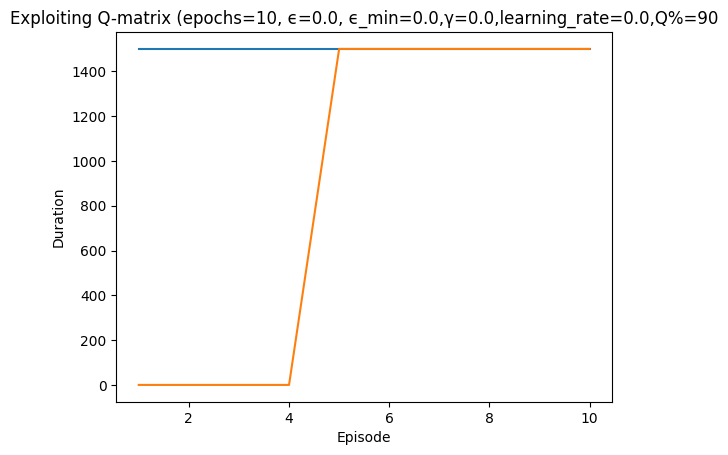

In [9]:
if reload: pass
else:
    # Evaluate an agent that exploits the Q-table learnt above
    tabularq_exploit_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=tqa.QTabularLearner(
            ep,
            trained=tabularq_run['learner'],
            gamma=0.0,
            learning_rate=0.0,
            exploit_percentile=90),
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=0.0,
        render=False,
        verbosity=Verbosity.Normal,
        title="Exploiting Q-matrix"
    )

In [10]:
if reload: pass
else:
    # Evaluate the Deep Q-learning agent
    dql_run = learner.epsilon_greedy_search(
        cyberbattle_gym_env=gym_env,
        environment_properties=ep,
        learner=dqla.DeepQLearnerPolicy(
            ep=ep,
            gamma=0.015,
            replay_memory_size=10000,
            target_update=10,
            batch_size=512,
            # torch default learning rate is 1e-2
            # a large value helps converge in less episodes
            learning_rate=0.01
        ),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Normal,
        render=False,
        plot_episodes_length=False,
        title="DQL"
    )

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 59|reward:  108.0|last_reward_at:   57|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=40 explore r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[ 2.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 10.  2.  5.  3.  5.  2.  2.  5.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=54 explore r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state

Episode 1|Iteration 59|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:00:00||

    + t=59 explore r=50.0 cum_reward:108.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 18.  2.  7.  3.  5.  3.  4.  7.  3.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  


Episode 1|Iteration 207|reward:  231.0|last_reward_at:  207|Elapsed Time: 0:00:00||

    + t=166 explore r=9.0 cum_reward:117.0 a=[abstract_action=7, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 22. 11. 10.  3. 10.  6. 10. 13.  8.  4.  7.  2.  3.  3.  4.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  
    + t=194 explore r=100.0 cum_reward:217.0 a=[abstract_action=15, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2.
 2. 6. 3. 2. 2. 2. 7. 6. 3. 5. 2. 5. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([5, 1, 4, 1], dtype=int32)} creds=2  
    + t=207 explore r=14.0 cum_reward:231.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 1|Iteration 399|reward:  245.0|last_reward_at:  368|Elapsed Time: 0:00:01||

    + t=368 explore r=14.0 cum_reward:245.0 a=[abstract_action=4, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 29. 17. 11.  5. 13.  6. 13. 18. 13. 10. 12. 28. 10.  8.  7.
  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=4  


Episode 1|Iteration 431|reward:  295.0|last_reward_at:  419|Elapsed Time: 0:00:01||

    + t=419 explore r=50.0 cum_reward:295.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 30. 18. 12.  5. 13.  6. 14. 19. 13. 15. 14. 34. 10. 10.  9.
 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 1|Iteration 488|reward:  301.0|last_reward_at:  484|Elapsed Time: 0:00:02||

    + t=484 explore r=6.0 cum_reward:301.0 a=[abstract_action=3, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 0. 1. 3. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([7, 7, 0], dtype=int32)} creds=4  


Episode 1|Iteration 587|reward:  312.0|last_reward_at:  576|Elapsed Time: 0:00:04||

    + t=576 explore r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  2.  0.  0.  0.  0.
  0.  0.  0. 32. 22. 20.  8. 14.  7. 16. 19. 15. 17. 20. 45. 11. 15. 13.
 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 5, 2], dtype=int32)} creds=4  


Episode 1|Iteration 1500|reward:  312.0|last_reward_at:  576|Elapsed Time: 0:00:15||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/106 (0.02)
    explore-remote: 8/577 (0.01)
    explore-connect: 3/514 (0.01)
    exploit-local: 0/5 (0.00)
    exploit-remote: 0/131 (0.00)
    exploit-connect: 0/154 (0.00)
  exploit deflected to exploration: 16
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 19|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=4 explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=12 explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 1.
 1. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  


Episode 2|Iteration 20|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||

    + t=20 explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 1.
 1. 3. 2. 4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  


Episode 2|Iteration 63|reward:   42.0|last_reward_at:   50|Elapsed Time: 0:00:00||

    + t=50 explore r=6.0 cum_reward:42.0 a=[abstract_action=3, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 1. 4.
 3. 5. 3. 9. 2. 1. 1. 0. 1. 1. 3. 2. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=1  


Episode 2|Iteration 98|reward:  103.0|last_reward_at:   98|Elapsed Time: 0:00:01||

    + t=87 explore r=11.0 cum_reward:53.0 a=[abstract_action=9, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 11.  6.  9.  3.  5.  3. 18.  3.  3.  1.  0.  3.  2.  4.  5.
  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=98 explore r=50.0 cum_reward:103.0 a=[abstract_action=12, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 13.  9.  9.  3.  5.  3. 19.  5.  3.  1.  0.  3.  2.  5.  6.
  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 2|Iteration 121|reward:  114.0|last_reward_at:  109|Elapsed Time: 0:00:01||

    + t=109 explore r=11.0 cum_reward:114.0 a=[abstract_action=6, actor=3, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=1  


Episode 2|Iteration 167|reward:  178.0|last_reward_at:  167|Elapsed Time: 0:00:02||

    + t=149 explore r=14.0 cum_reward:128.0 a=[abstract_action=10, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 2.
 0. 4. 2. 3. 3. 0. 0. 0. 2. 1. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=2  
    + t=167 exploit r=50.0 cum_reward:178.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 15. 14. 11.  4.  8.  5. 21. 13.  4.  2.  1.  4.  3.  7.  7.
  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  


Episode 2|Iteration 190|reward:  198.0|last_reward_at:  177|Elapsed Time: 0:00:02||

    + t=177 explore r=9.0 cum_reward:187.0 a=[abstract_action=7, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 2.
 1. 5. 2. 3. 6. 0. 0. 2. 4. 1. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=3  


Episode 2|Iteration 209|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:02||

    + t=190 explore r=11.0 cum_reward:198.0 a=[abstract_action=5, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  
    + t=202 exploit r=100.0 cum_reward:298.0 a=[abstract_action=15, actor=6, state=[5. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 2. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  
    + t=203 exploit r=14.0 cum_reward:312.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 2|Iteration 1500|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:19||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/79 (0.01)
    explore-remote: 8/421 (0.02)
    explore-connect: 1/388 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 0/457 (0.00)
    exploit-connect: 2/131 (0.02)
  exploit deflected to exploration: 1
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 3|Iteration 34|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

    + t=20 explore r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0.
 0. 2. 2. 0. 7. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=33 explore r=100.0 cum_reward:131.0 a=[abstract_action=15, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 2.
 0. 2. 3. 0. 9. 2. 0. 1. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=34 explore r=11.0 cum_reward:142.0 a=[abstract_action=8, actor=1, state=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'remote_vulnerability': array([1, 1, 5], dtype=int32)} creds=1  


Episode 3|Iteration 51|reward:  167.0|last_reward_at:   51|Elapsed Time: 0:00:00||

    + t=38 exploit r=14.0 cum_reward:156.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([1, 1])} creds=2  
    + t=51 exploit r=11.0 cum_reward:167.0 a=[abstract_action=6, actor=1, state=[3. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'remote_vulnerability': array([1, 2, 3])} creds=2  


Episode 3|Iteration 182|reward:  231.0|last_reward_at:  182|Elapsed Time: 0:00:02||

    + t=173 exploit r=14.0 cum_reward:181.0 a=[abstract_action=10, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 32.  0.  4.  3.  2. 10.  2.  7.  7.  2.  3.  3.  0.  2.  3.  2.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  4.]]-{'remote_vulnerability': array([1, 5, 7])} creds=3  
    + t=182 exploit r=50.0 cum_reward:231.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  9.  6.  2.  4. 11.  6.  2. 14.  3.  4.  8.  3.  4.  4.  1.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 3|Iteration 209|reward:  295.0|last_reward_at:  195|Elapsed Time: 0:00:02||

    + t=194 explore r=14.0 cum_reward:245.0 a=[abstract_action=4, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0. 39.  0.  4.  3.  2. 10.  2.  7.  7.  2.  3.  4.  0.  2.  5.  2.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'remote_vulnerability': array([1, 3, 1], dtype=int32)} creds=4  
    + t=195 exploit r=50.0 cum_reward:295.0 a=[abstract_action=12, actor=1, state=[ 5.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0. 39.  0.  4.  3.  2. 10.  2.  7.  7.  2.  3.  4.  0.  2.  5.  2.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 3|Iteration 235|reward:  312.0|last_reward_at:  227|Elapsed Time: 0:00:03||

    + t=222 explore r=6.0 cum_reward:301.0 a=[abstract_action=3, actor=1, state=[ 4.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0. 39.  0.  4.  3.  2. 10.  3.  7.  7.  4.  3.  6.  1.  2.  6.  3.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 7, 0], dtype=int32)} creds=4  
    + t=227 explore r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=1, state=[ 4.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0. 39.  0.  4.  3.  2. 10.  3.  7.  7.  4.  3.  6.  1.  2.  6.  3.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 6, 2], dtype=int32)} creds=4  


Episode 3|Iteration 1228|reward:  426.0|last_reward_at: 1228|Elapsed Time: 0:00:17||

    + t=1223 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0. 63.  0. 27. 22. 22. 30. 22. 23. 26. 28.  7. 26. 12. 15. 20. 14.
  7.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=4  
    + t=1228 explore r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=4, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([4, 0], dtype=int32)} creds=5  


Episode 3|Iteration 1292|reward:  476.0|last_reward_at: 1281|Elapsed Time: 0:00:18||

    + t=1281 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=7, state=[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 27. 24. 20. 17. 16. 14. 17. 23.  7. 35. 12. 14. 23. 11.
 10.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'connect': array([7, 9, 1, 4], dtype=int32)} creds=5  


Episode 3|Iteration 1500|reward:  476.0|last_reward_at: 1281|Elapsed Time: 0:00:23||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/60 (0.03)
    explore-remote: 5/333 (0.01)
    explore-connect: 1/333 (0.00)
    exploit-local: 1/81 (0.01)
    exploit-remote: 3/526 (0.01)
    exploit-connect: 4/151 (0.03)
  exploit deflected to exploration: 33
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 10|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=8 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=10 explore r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  


Episode 4|Iteration 45|reward:  156.0|last_reward_at:   37|Elapsed Time: 0:00:00||

    + t=33 exploit r=11.0 cum_reward:42.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0.
 1. 2. 4. 2. 5. 2. 0. 4. 0. 1. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  
    + t=35 exploit r=100.0 cum_reward:142.0 a=[abstract_action=15, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0.
 1. 2. 4. 2. 6. 2. 0. 4. 0. 1. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=37 exploit r=14.0 cum_reward:156.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([1, 1])} creds=2  


Episode 4|Iteration 65|reward:  220.0|last_reward_at:   54|Elapsed Time: 0:00:01||

    + t=53 explore r=14.0 cum_reward:170.0 a=[abstract_action=4, actor=1, state=[3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 2. 2. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'remote_vulnerability': array([1, 3, 1], dtype=int32)} creds=3  
    + t=54 exploit r=50.0 cum_reward:220.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 4. 1. 1.
 2. 2. 4. 2. 7. 3. 0. 4. 0. 1. 3. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'connect': array([0, 5, 1, 2], dtype=int32)} creds=3  


Episode 4|Iteration 80|reward:  226.0|last_reward_at:   74|Elapsed Time: 0:00:01||

    + t=74 exploit r=6.0 cum_reward:226.0 a=[abstract_action=3, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 6. 2. 1.
 2. 2. 4. 2. 8. 4. 0. 5. 0. 1. 4. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 5, 0])} creds=3  


Episode 4|Iteration 146|reward:  237.0|last_reward_at:  140|Elapsed Time: 0:00:02||

    + t=140 exploit r=11.0 cum_reward:237.0 a=[abstract_action=6, actor=0, state=[ 3.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 10.  8.  3.  3.  2.  5.  3.  8.  4.  0.  8.  0.  2.  7.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 2, 3])} creds=3  


Episode 4|Iteration 180|reward:  312.0|last_reward_at:  180|Elapsed Time: 0:00:02||

    + t=166 explore r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 11. 11.  3.  3.  2.  5.  3.  8.  4.  1.  8.  0.  2.  7.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 6, 7], dtype=int32)} creds=4  
    + t=169 exploit r=50.0 cum_reward:301.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 11. 11.  3.  3.  2.  5.  4.  8.  4.  1.  8.  0.  2.  7.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  
    + t=180 exploit r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 4.
 3. 3. 0. 1. 3. 1. 0. 1. 0. 3. 4. 0. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([5, 7, 2])} creds=4  


Episode 4|Iteration 357|reward:  426.0|last_reward_at:  352|Elapsed Time: 0:00:05||

    + t=351 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  6.  0.  8.  4.  7.  3. 10.  6.  8.  4.  5. 12.  4.  4. 10.  6.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=4  
    + t=352 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=4, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([4, 0])} creds=5  


Episode 4|Iteration 383|reward:  476.0|last_reward_at:  379|Elapsed Time: 0:00:05||

    + t=379 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=4, state=[5. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 2.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([4, 9, 1, 4], dtype=int32)} creds=5  


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  379|Elapsed Time: 0:00:30||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/70 (0.01)
    explore-remote: 3/336 (0.01)
    explore-connect: 0/345 (0.00)
    exploit-local: 2/76 (0.03)
    exploit-remote: 5/599 (0.01)
    exploit-connect: 5/58 (0.08)
  exploit deflected to exploration: 151
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 5|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||

    + t=18 exploit r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2.
 0. 2. 2. 1. 2. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  


Episode 5|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

    + t=28 exploit r=6.0 cum_reward:42.0 a=[abstract_action=3, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.
 0. 4. 2. 1. 4. 6. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 0])} creds=1  


Episode 5|Iteration 68|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:00:00||

    + t=58 exploit r=50.0 cum_reward:92.0 a=[abstract_action=12, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  5.  5.  6.  2.  5.  3.  3.  5. 11.  0.  0.  0.  3.  1.  2.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=61 explore r=11.0 cum_reward:103.0 a=[abstract_action=9, actor=3, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([3, 1, 6], dtype=int32)} creds=1  


Episode 5|Iteration 87|reward:  178.0|last_reward_at:   87|Elapsed Time: 0:00:01||

    + t=75 exploit r=11.0 cum_reward:114.0 a=[abstract_action=6, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  5.  6.  6.  2.  6.  3.  3.  5. 11.  0.  0.  0.  3.  1.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 4, 3])} creds=1  
    + t=79 explore r=14.0 cum_reward:128.0 a=[abstract_action=10, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 1. 0. 1. 1. 2. 2. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=2  
    + t=87 exploit r=50.0 cum_reward:178.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  5.  7.  6.  3.  6.  3.  3.  5. 12.  0.  0.  0.  3.  1.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  


Episode 5|Iteration 144|reward:  287.0|last_reward_at:  138|Elapsed Time: 0:00:02||

    + t=137 exploit r=9.0 cum_reward:187.0 a=[abstract_action=7, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  7.  9.  7.  5.  7.  3.  3.  5. 14.  0.  1.  1.  3.  2.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 4, 4])} creds=3  
    + t=138 exploit r=100.0 cum_reward:287.0 a=[abstract_action=15, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  7.  9.  7.  5.  7.  3.  3.  5. 14.  0.  1.  1.  3.  2.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 1, 4, 2], dtype=int32)} creds=3  


Episode 5|Iteration 168|reward:  301.0|last_reward_at:  162|Elapsed Time: 0:00:02||

    + t=162 exploit[undefined]->explore r=14.0 cum_reward:301.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 5|Iteration 513|reward:  401.0|last_reward_at:  502|Elapsed Time: 0:00:07||

    + t=502 exploit r=100.0 cum_reward:401.0 a=[abstract_action=17, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  8.  0.  7. 14.  4. 15.  1.  6.  8.  7.  1.  9.  2.  6.  5.  2.
  3.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  


Episode 5|Iteration 521|reward:  465.0|last_reward_at:  521|Elapsed Time: 0:00:07||

    + t=514 exploit r=14.0 cum_reward:415.0 a=[abstract_action=0, actor=7, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([7, 0])} creds=5  
    + t=521 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=3, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  9. 11. 11.  7. 11.  9.  9. 15.  5. 10.  2.  4.  8.  2.
  5.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([3, 8, 1, 4], dtype=int32)} creds=5  


Episode 5|Iteration 595|reward:  476.0|last_reward_at:  591|Elapsed Time: 0:00:09||

    + t=591 exploit[undefined]->explore r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=6, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 13. 15. 10. 12.  9.  9.  7. 17.  2.  5.  2.  1.  4.  1.
  5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=5  


Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  591|Elapsed Time: 0:00:30||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/44 (0.02)
    explore-remote: 3/284 (0.01)
    explore-connect: 0/255 (0.00)
    exploit-local: 2/90 (0.02)
    exploit-remote: 5/759 (0.01)
    exploit-connect: 5/52 (0.09)
  exploit deflected to exploration: 133
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=3 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  


Episode 6|Iteration 35|reward:  103.0|last_reward_at:   27|Elapsed Time: 0:00:00||

    + t=20 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2.
 4. 1. 2. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=21 exploit r=6.0 cum_reward:42.0 a=[abstract_action=3, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2.
 4. 1. 2. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 0])} creds=1  
    + t=25 exploit r=11.0 cum_reward:53.0 a=[abstract_action=9, actor=0, state=[3. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2.
 4. 1. 3. 4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 1, 6])} creds=1  
    + t=27 exploit r=50.0 cum_reward:103.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0

Episode 6|Iteration 57|reward:  114.0|last_reward_at:   49|Elapsed Time: 0:00:00||

    + t=49 exploit r=11.0 cum_reward:114.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 3. 4. 2.
 5. 2. 4. 4. 0. 1. 0. 1. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 3])} creds=1  


Episode 6|Iteration 82|reward:  139.0|last_reward_at:   82|Elapsed Time: 0:00:01||

    + t=74 exploit[undefined]->explore r=14.0 cum_reward:128.0 a=[abstract_action=10, actor=0, state=[4. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 5. 4. 3.
 6. 3. 4. 4. 4. 1. 1. 3. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=2  
    + t=82 exploit r=11.0 cum_reward:139.0 a=[abstract_action=5, actor=0, state=[5. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 5. 5. 3.
 7. 3. 4. 4. 4. 1. 1. 3. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]]-{'remote_vulnerability': array([0, 6, 2])} creds=2  


Episode 6|Iteration 141|reward:  198.0|last_reward_at:  131|Elapsed Time: 0:00:02||

    + t=124 exploit r=50.0 cum_reward:189.0 a=[abstract_action=12, actor=0, state=[ 6.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  7.  6.  5.  7.  3.  4.  4. 13.  4.  2.  3.  3.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  
    + t=131 exploit r=9.0 cum_reward:198.0 a=[abstract_action=7, actor=0, state=[ 5.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  8.  6.  5.  7.  3.  4.  4. 13.  5.  2.  3.  3.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 4, 4])} creds=3  


Episode 6|Iteration 159|reward:  298.0|last_reward_at:  146|Elapsed Time: 0:00:02||

    + t=146 exploit[undefined]->explore r=100.0 cum_reward:298.0 a=[abstract_action=15, actor=0, state=[ 5.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  8.  6.  5.  7.  5.  6.  4. 13.  6.  3.  3.  3.  0.  2.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 1, 4, 2], dtype=int32)} creds=3  


Episode 6|Iteration 209|reward:  312.0|last_reward_at:  204|Elapsed Time: 0:00:03||

    + t=204 explore r=14.0 cum_reward:312.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 5. 1. 2. 1. 0. 2. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 6|Iteration 232|reward:  412.0|last_reward_at:  222|Elapsed Time: 0:00:03||

    + t=222 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 5. 1. 4. 2. 0. 3. 1. 1. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 6|Iteration 242|reward:  426.0|last_reward_at:  234|Elapsed Time: 0:00:03||

    + t=234 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  


Episode 6|Iteration 279|reward:  476.0|last_reward_at:  275|Elapsed Time: 0:00:04||

    + t=275 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  2.  0.  0.  1.  0.
  0.  0.  0. 12. 10.  7.  9.  6.  7.  6. 16.  7.  4.  3.  3.  0.  3.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  275|Elapsed Time: 0:00:31||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/32 (0.03)
    explore-remote: 3/251 (0.01)
    explore-connect: 1/247 (0.00)
    exploit-local: 2/108 (0.02)
    exploit-remote: 5/840 (0.01)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 149
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=10 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 1. 2. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 7|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

    + t=17 exploit r=11.0 cum_reward:33.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.
 2. 3. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 7|Iteration 43|reward:  117.0|last_reward_at:   43|Elapsed Time: 0:00:00||

    + t=34 exploit r=14.0 cum_reward:47.0 a=[abstract_action=4, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 5.
 5. 5. 3. 6. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 1])} creds=1  
    + t=37 exploit r=9.0 cum_reward:56.0 a=[abstract_action=7, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 5.
 6. 5. 3. 6. 3. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 2, 4])} creds=2  
    + t=38 exploit r=50.0 cum_reward:106.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 5.
 6. 5. 3. 6. 3. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=2  
    + t=43 exploit r=11.0 cum_reward:117.0 a=[abstract_action=6, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

Episode 7|Iteration 72|reward:  223.0|last_reward_at:   68|Elapsed Time: 0:00:00||

    + t=62 exploit r=100.0 cum_reward:217.0 a=[abstract_action=15, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 5. 2. 5.
 7. 6. 6. 7. 3. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=68 explore r=6.0 cum_reward:223.0 a=[abstract_action=3, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'remote_vulnerability': array([1, 4, 0], dtype=int32)} creds=2  


Episode 7|Iteration 103|reward:  237.0|last_reward_at:   87|Elapsed Time: 0:00:01||

    + t=87 explore r=14.0 cum_reward:237.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 7|Iteration 133|reward:  337.0|last_reward_at:  119|Elapsed Time: 0:00:01||

    + t=119 exploit r=100.0 cum_reward:337.0 a=[abstract_action=17, actor=1, state=[4. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
 0. 1. 1. 1. 1. 2. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  


Episode 7|Iteration 149|reward:  401.0|last_reward_at:  140|Elapsed Time: 0:00:02||

    + t=139 explore r=14.0 cum_reward:351.0 a=[abstract_action=0, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([6, 0], dtype=int32)} creds=4  
    + t=140 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=6, state=[4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'connect': array([6, 7, 1, 3], dtype=int32)} creds=4  


Episode 7|Iteration 268|reward:  415.0|last_reward_at:  261|Elapsed Time: 0:00:04||

    + t=261 exploit r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 6.
 2. 5. 5. 3. 5. 5. 0. 3. 2. 1. 3. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([4, 5, 7])} creds=5  


Episode 7|Iteration 294|reward:  426.0|last_reward_at:  284|Elapsed Time: 0:00:05||

    + t=284 exploit r=11.0 cum_reward:426.0 a=[abstract_action=5, actor=1, state=[4. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 6. 0. 4. 5.
 2. 4. 4. 5. 6. 5. 0. 0. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'remote_vulnerability': array([1, 8, 2])} creds=5  


Episode 7|Iteration 313|reward:  476.0|last_reward_at:  307|Elapsed Time: 0:00:05||

    + t=307 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=1, state=[5. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 6. 0. 5. 7.
 2. 4. 5. 5. 6. 5. 0. 0. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 8.]]-{'connect': array([1, 8, 1, 4], dtype=int32)} creds=5  


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  307|Elapsed Time: 0:00:32||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/36 (0.08)
    explore-remote: 1/243 (0.00)
    explore-connect: 0/206 (0.00)
    exploit-local: 0/134 (0.00)
    exploit-remote: 7/861 (0.01)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 179
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 16|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=6 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 8|Iteration 19|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

    + t=19 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 0.
 1. 1. 0. 2. 4. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  


Episode 8|Iteration 34|reward:   56.0|last_reward_at:   34|Elapsed Time: 0:00:00||

    + t=31 exploit r=11.0 cum_reward:42.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2.
 3. 2. 1. 3. 4. 5. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  
    + t=34 exploit[undefined]->explore r=14.0 cum_reward:56.0 a=[abstract_action=4, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2.
 4. 2. 1. 4. 4. 5. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  


Episode 8|Iteration 39|reward:  106.0|last_reward_at:   39|Elapsed Time: 0:00:00||

    + t=39 exploit r=50.0 cum_reward:106.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2.
 4. 2. 1. 4. 7. 5. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=2  


Episode 8|Iteration 65|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:00:00||

    + t=52 exploit r=11.0 cum_reward:117.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 3. 2. 2.
 4. 2. 1. 5. 8. 6. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 2, 3])} creds=2  
    + t=56 exploit r=14.0 cum_reward:131.0 a=[abstract_action=10, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 3. 3. 2.
 4. 2. 1. 5. 9. 7. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 5, 7])} creds=3  


Episode 8|Iteration 82|reward:  181.0|last_reward_at:   68|Elapsed Time: 0:00:01||

    + t=68 explore r=50.0 cum_reward:181.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  2.  4.  3.  2.  6. 10.  9.  1.  1.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 8|Iteration 132|reward:  295.0|last_reward_at:  132|Elapsed Time: 0:00:01||

    + t=118 exploit r=100.0 cum_reward:281.0 a=[abstract_action=15, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  3.  7.  6.  6.  8. 12. 10.  1.  3.  1.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=3  
    + t=132 exploit r=14.0 cum_reward:295.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 8|Iteration 194|reward:  409.0|last_reward_at:  188|Elapsed Time: 0:00:02||

    + t=184 exploit r=100.0 cum_reward:395.0 a=[abstract_action=17, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 2.
 0. 1. 2. 5. 1. 2. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  
    + t=188 exploit r=14.0 cum_reward:409.0 a=[abstract_action=0, actor=7, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([7, 0])} creds=5  


Episode 8|Iteration 239|reward:  420.0|last_reward_at:  231|Elapsed Time: 0:00:03||

    + t=231 exploit r=11.0 cum_reward:420.0 a=[abstract_action=5, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  2.  0.  0.  1.  0.
  0.  0.  0.  5.  6.  5.  9.  8.  6.  9. 13. 13.  2.  4.  1.  2.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]]-{'remote_vulnerability': array([0, 6, 2])} creds=5  


Episode 8|Iteration 254|reward:  470.0|last_reward_at:  248|Elapsed Time: 0:00:03||

    + t=248 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=7, state=[5. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 1.
 2. 0. 0. 2. 1. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'connect': array([7, 8, 1, 4], dtype=int32)} creds=5  


Episode 8|Iteration 648|reward:  476.0|last_reward_at:  644|Elapsed Time: 0:00:13||

    + t=644 exploit r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=6, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  7. 12. 17. 16. 10.  7. 11.  6.  5.  4.  0.  2.  1.  3.
  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([6, 4, 0])} creds=5  


Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  644|Elapsed Time: 0:00:33||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/42 (0.00)
    explore-remote: 1/213 (0.00)
    explore-connect: 1/212 (0.00)
    exploit-local: 3/106 (0.03)
    exploit-remote: 7/895 (0.01)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 189
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=7 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=12 exploit r=11.0 cum_reward:33.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 9|Iteration 75|reward:   44.0|last_reward_at:   64|Elapsed Time: 0:00:01||

    + t=64 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[ 3.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  3. 13.  4.  8.  3.  6.  4. 14.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 2, 3])} creds=0  


Episode 9|Iteration 96|reward:  122.0|last_reward_at:   96|Elapsed Time: 0:00:01||

    + t=91 exploit r=14.0 cum_reward:58.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  8. 17.  6. 13.  5.  7.  7. 15.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 4, 7])} creds=1  
    + t=92 exploit r=14.0 cum_reward:72.0 a=[abstract_action=4, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  8. 17.  6. 13.  5.  7.  7. 15.  8.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 3, 1])} creds=2  
    + t=96 exploit r=50.0 cum_reward:122.0 a=[abstract_action=12, actor=0, state=[ 6.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  8. 17.  6. 13.  6.  7.  7. 15.  9.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  


Episode 9|Iteration 138|reward:  172.0|last_reward_at:  134|Elapsed Time: 0:00:02||

    + t=134 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=6, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1.
 1. 4. 2. 2. 0. 2. 0. 0. 0. 1. 4. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([6, 5, 1, 0], dtype=int32)} creds=2  


Episode 9|Iteration 170|reward:  183.0|last_reward_at:  163|Elapsed Time: 0:00:02||

    + t=163 exploit r=11.0 cum_reward:183.0 a=[abstract_action=5, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 4. 2.
 2. 4. 2. 3. 2. 3. 0. 0. 0. 1. 4. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([6, 5, 2])} creds=2  


Episode 9|Iteration 216|reward:  189.0|last_reward_at:  207|Elapsed Time: 0:00:03||

    + t=207 exploit r=6.0 cum_reward:189.0 a=[abstract_action=3, actor=5, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.
 2. 4. 0. 2. 5. 4. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([5, 6, 0])} creds=2  


Episode 9|Iteration 441|reward:  298.0|last_reward_at:  441|Elapsed Time: 0:00:07||

    + t=426 explore r=9.0 cum_reward:198.0 a=[abstract_action=7, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 13. 28. 19. 23. 19. 14. 18. 24. 25.  3.  0.  3.  2.  4.  4.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=3  
    + t=441 exploit r=100.0 cum_reward:298.0 a=[abstract_action=15, actor=6, state=[ 5.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0. 17. 13. 12. 17.  7. 20.  8. 11.  2.  0.  1.  5.  8.  3.
  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  


Episode 9|Iteration 453|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:07||

    + t=446 exploit[undefined]->explore r=14.0 cum_reward:312.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 9|Iteration 651|reward:  412.0|last_reward_at:  647|Elapsed Time: 0:00:10||

    + t=647 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 13.  0.  3.  5.  5.  2.  6.  3.  5.  3.  2.  8.  0.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 9|Iteration 660|reward:  476.0|last_reward_at:  655|Elapsed Time: 0:00:11||

    + t=653 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  
    + t=655 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=5, state=[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  9. 17. 14. 15.  8. 14. 23. 14.  2. 11.  3.  2.  7.  3.
  4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([5, 9, 1, 4], dtype=int32)} creds=5  


Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  655|Elapsed Time: 0:00:30||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/32 (0.03)
    explore-remote: 1/215 (0.00)
    explore-connect: 0/184 (0.00)
    exploit-local: 2/105 (0.02)
    exploit-remote: 7/908 (0.01)
    exploit-connect: 5/40 (0.11)
  exploit deflected to exploration: 173
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=5 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 10|Iteration 26|reward:  156.0|last_reward_at:   26|Elapsed Time: 0:00:00||

    + t=19 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 2.
 4. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=20 exploit r=11.0 cum_reward:42.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 2.
 4. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  
    + t=22 exploit r=100.0 cum_reward:142.0 a=[abstract_action=15, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 2.
 4. 0. 0. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=26 exploit r=14.0 cum_reward:156.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1

Episode 10|Iteration 76|reward:  167.0|last_reward_at:   62|Elapsed Time: 0:00:01||

    + t=62 exploit r=11.0 cum_reward:167.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3. 7. 3.
 4. 1. 3. 2. 4. 2. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 2, 3])} creds=2  


Episode 10|Iteration 140|reward:  181.0|last_reward_at:  134|Elapsed Time: 0:00:02||

    + t=134 exploit r=14.0 cum_reward:181.0 a=[abstract_action=4, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 10.  0.  3.  3.  6.  4.  5.  4.  6.  1.  2.  0.  0.  1.  4.  1.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  4.]]-{'remote_vulnerability': array([1, 3, 1])} creds=3  


Episode 10|Iteration 182|reward:  231.0|last_reward_at:  177|Elapsed Time: 0:00:02||

    + t=177 exploit r=50.0 cum_reward:231.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  8. 13.  7. 10. 10. 12.  8.  5.  7.  2.  2.  2.  1.  4.  1.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 10|Iteration 203|reward:  331.0|last_reward_at:  196|Elapsed Time: 0:00:03||

    + t=196 exploit r=100.0 cum_reward:331.0 a=[abstract_action=17, actor=1, state=[ 4.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 11.  0.  5.  5.  8.  5. 10.  5. 12.  2.  2.  0.  1.  3.  6.  1.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=3  


Episode 10|Iteration 225|reward:  345.0|last_reward_at:  217|Elapsed Time: 0:00:03||

    + t=217 exploit r=14.0 cum_reward:345.0 a=[abstract_action=0, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([4, 0])} creds=4  


Episode 10|Iteration 243|reward:  351.0|last_reward_at:  235|Elapsed Time: 0:00:03||

    + t=235 exploit r=6.0 cum_reward:351.0 a=[abstract_action=3, actor=1, state=[ 4.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. 12.  0.  7.  7.  8.  5. 11.  6. 13.  3.  2.  0.  1.  3.  7.  1.
  3.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 6, 0])} creds=4  


Episode 10|Iteration 270|reward:  401.0|last_reward_at:  267|Elapsed Time: 0:00:04||

    + t=267 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=4, state=[4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 5. 3.
 0. 3. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'connect': array([4, 7, 1, 3], dtype=int32)} creds=4  


Episode 10|Iteration 353|reward:  465.0|last_reward_at:  348|Elapsed Time: 0:00:06||

    + t=347 exploit r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=1, state=[ 3.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. 19.  0. 10.  8. 11.  9. 11. 10. 15.  6.  2.  1.  1.  3.  7.  2.
  4.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 5, 7])} creds=5  
    + t=348 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=1, state=[ 4.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  1.  0. 19.  0. 10.  8. 11.  9. 11. 10. 15.  6.  2.  1.  1.  3.  7.  2.
  4.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 8, 1, 4], dtype=int32)} creds=5  


Episode 10|Iteration 417|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:07||

    + t=412 exploit r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=4, state=[ 3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0. 16.  0.  0. 12.  4.  1.  5.  2.  4.  5.  6.  0.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  4.]]-{'remote_vulnerability': array([4, 8, 2])} creds=5  


Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/28 (0.00)
    explore-remote: 0/179 (0.00)
    explore-connect: 0/149 (0.00)
    exploit-local: 3/137 (0.02)
    exploit-remote: 8/965 (0.01)
    exploit-connect: 5/26 (0.16)
  exploit deflected to exploration: 165
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  


Episode 11|Iteration 26|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=12 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3.
 2. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 11|Iteration 67|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:00||

    + t=46 explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 9. 5.
 5. 5. 1. 7. 2. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  


Episode 11|Iteration 82|reward:   47.0|last_reward_at:   69|Elapsed Time: 0:00:01||

    + t=69 exploit r=11.0 cum_reward:47.0 a=[abstract_action=9, actor=0, state=[ 3.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  9. 12.  6.  6.  6. 11.  3.  7.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 1, 6])} creds=1  


Episode 11|Iteration 99|reward:  122.0|last_reward_at:   99|Elapsed Time: 0:00:01||

    + t=85 explore r=50.0 cum_reward:97.0 a=[abstract_action=12, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  5.  9. 13.  9.  7.  7. 14.  6.  8.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=91 exploit r=11.0 cum_reward:108.0 a=[abstract_action=6, actor=3, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 3])} creds=1  
    + t=99 exploit r=14.0 cum_reward:122.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  6.  9. 13. 11.  7.  7. 15.  7.  9.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 5, 7])} creds=2  


Episode 11|Iteration 120|reward:  178.0|last_reward_at:  107|Elapsed Time: 0:00:01||

    + t=105 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=3, state=[5. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 1. 2. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'connect': array([3, 6, 1, 1], dtype=int32)} creds=2  
    + t=107 exploit r=6.0 cum_reward:178.0 a=[abstract_action=3, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([6, 3, 0])} creds=2  


Episode 11|Iteration 133|reward:  189.0|last_reward_at:  123|Elapsed Time: 0:00:01||

    + t=123 exploit r=11.0 cum_reward:189.0 a=[abstract_action=5, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 3. 1. 2. 2. 2. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([3, 6, 2])} creds=2  


Episode 11|Iteration 184|reward:  298.0|last_reward_at:  184|Elapsed Time: 0:00:02||

    + t=170 exploit r=9.0 cum_reward:198.0 a=[abstract_action=7, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  8.  9. 13. 12. 11.  7. 17.  8. 13.  1.  0.  0.  0.  1.  2.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 4, 4])} creds=3  
    + t=184 exploit r=100.0 cum_reward:298.0 a=[abstract_action=15, actor=3, state=[5. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1.
 9. 5. 2. 4. 9. 3. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([3, 1, 4, 2], dtype=int32)} creds=3  


Episode 11|Iteration 217|reward:  312.0|last_reward_at:  209|Elapsed Time: 0:00:03||

    + t=209 exploit r=14.0 cum_reward:312.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 11|Iteration 231|reward:  412.0|last_reward_at:  226|Elapsed Time: 0:00:03||

    + t=226 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 1.
 2. 1. 1. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 11|Iteration 290|reward:  426.0|last_reward_at:  284|Elapsed Time: 0:00:04||

    + t=284 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 2. 3. 2. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  


Episode 11|Iteration 378|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:05||

    + t=371 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=6, state=[ 5.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  7.  5.  7. 11.  6.  2.  8.  6.  2.  0.  3.  3.  1.  3.
  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([6, 9, 1, 4], dtype=int32)} creds=5  


Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||


  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/41 (0.00)
    explore-remote: 1/168 (0.01)
    explore-connect: 1/167 (0.01)
    exploit-local: 3/124 (0.02)
    exploit-remote: 7/972 (0.01)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 177
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  


Episode 12|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

    + t=14 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0.
 4. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 12|Iteration 26|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||

    + t=26 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 2. 1.
 5. 0. 1. 6. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  


Episode 12|Iteration 64|reward:   53.0|last_reward_at:   64|Elapsed Time: 0:00:00||

    + t=58 exploit r=11.0 cum_reward:47.0 a=[abstract_action=9, actor=0, state=[ 3.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  5.  2.  5.  7.  4.  7. 13.  1.  7.  1.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 1, 6])} creds=1  
    + t=64 exploit r=6.0 cum_reward:53.0 a=[abstract_action=3, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  5.  2.  5.  8.  4.  8. 13.  1.  8.  1.  1.  0.  0.  0.  1.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 3, 0])} creds=1  


Episode 12|Iteration 92|reward:  103.0|last_reward_at:   83|Elapsed Time: 0:00:01||

    + t=83 exploit r=50.0 cum_reward:103.0 a=[abstract_action=12, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  7.  5.  6. 13.  5.  8. 15.  1. 10.  2.  1.  0.  0.  1.  1.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 12|Iteration 138|reward:  123.0|last_reward_at:  130|Elapsed Time: 0:00:02||

    + t=129 exploit[undefined]->explore r=9.0 cum_reward:112.0 a=[abstract_action=7, actor=3, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 6.
 1. 2. 1. 2. 4. 2. 0. 0. 1. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=2  
    + t=130 exploit r=11.0 cum_reward:123.0 a=[abstract_action=6, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  9.  7. 10. 16.  7.  9. 16.  3. 10.  3.  1.  0.  0.  1.  1.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 4, 3])} creds=2  


Episode 12|Iteration 185|reward:  251.0|last_reward_at:  185|Elapsed Time: 0:00:02||

    + t=171 explore r=100.0 cum_reward:223.0 a=[abstract_action=15, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 7.
 2. 4. 4. 3. 8. 4. 0. 1. 1. 0. 2. 0. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([3, 1, 4, 1], dtype=int32)} creds=2  
    + t=173 exploit[undefined]->explore r=14.0 cum_reward:237.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=185 exploit r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  9.  8. 13. 18. 10. 10. 20.  4. 12.  4.  4.  0.  0.  1.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 5, 7])} creds=4  


Episode 12|Iteration 200|reward:  301.0|last_reward_at:  186|Elapsed Time: 0:00:02||

    + t=186 exploit r=50.0 cum_reward:301.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  9.  8. 13. 18. 10. 10. 20.  4. 12.  4.  4.  0.  0.  1.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 12|Iteration 228|reward:  401.0|last_reward_at:  215|Elapsed Time: 0:00:03||

    + t=215 exploit r=100.0 cum_reward:401.0 a=[abstract_action=17, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=4  


Episode 12|Iteration 247|reward:  465.0|last_reward_at:  231|Elapsed Time: 0:00:03||

    + t=230 exploit r=14.0 cum_reward:415.0 a=[abstract_action=0, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([6, 0])} creds=5  
    + t=231 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 2. 2. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([7, 8, 1, 4], dtype=int32)} creds=5  


Episode 12|Iteration 296|reward:  476.0|last_reward_at:  290|Elapsed Time: 0:00:04||

    + t=290 exploit r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=3, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  9.  7.  2.  5.  5.  8.  9. 10.  0.  2.  1.  0.  3.  0.
  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([3, 7, 2])} creds=5  


Episode 12|Iteration 1500|reward:  476.0|last_reward_at:  290|Elapsed Time: 0:00:32||


  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 2/167 (0.01)
    explore-connect: 1/184 (0.01)
    exploit-local: 2/110 (0.02)
    exploit-remote: 6/988 (0.01)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 184
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=2 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=8 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 13|Iteration 27|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||

    + t=22 exploit[undefined]->explore r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 3. 3. 0. 2. 2. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=0  


Episode 13|Iteration 52|reward:  167.0|last_reward_at:   52|Elapsed Time: 0:00:00||

    + t=42 exploit r=9.0 cum_reward:53.0 a=[abstract_action=7, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 1. 4.
 6. 6. 0. 4. 4. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 3, 4])} creds=1  
    + t=51 exploit r=100.0 cum_reward:153.0 a=[abstract_action=15, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 2. 6.
 6. 6. 0. 4. 4. 8. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=52 exploit[undefined]->explore r=14.0 cum_reward:167.0 a=[abstract_action=4, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'remote_vulnerability': array([1, 2, 1], dtype=int32)} creds=2  


Episode 13|Iteration 68|reward:  181.0|last_reward_at:   61|Elapsed Time: 0:00:01||

    + t=61 exploit r=14.0 cum_reward:181.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 13|Iteration 86|reward:  231.0|last_reward_at:   83|Elapsed Time: 0:00:01||

    + t=83 exploit r=50.0 cum_reward:231.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  6.  5.  6. 10.  8.  0.  5.  6. 10.  0.  2.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=3  


Episode 13|Iteration 114|reward:  237.0|last_reward_at:   95|Elapsed Time: 0:00:01||

    + t=95 exploit r=6.0 cum_reward:237.0 a=[abstract_action=3, actor=1, state=[4. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 1. 1.
 4. 1. 0. 0. 0. 2. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([1, 5, 0])} creds=3  


Episode 13|Iteration 125|reward:  251.0|last_reward_at:  116|Elapsed Time: 0:00:02||

    + t=116 exploit r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([5, 4, 7])} creds=4  


Episode 13|Iteration 160|reward:  262.0|last_reward_at:  145|Elapsed Time: 0:00:02||

    + t=145 exploit r=11.0 cum_reward:262.0 a=[abstract_action=5, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  6.  9. 17. 11.  9.  2.  8. 10. 10.  0.  3.  2.  1.  1.  0.
  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 7, 2])} creds=4  


Episode 13|Iteration 216|reward:  312.0|last_reward_at:  204|Elapsed Time: 0:00:03||

    + t=204 exploit r=50.0 cum_reward:312.0 a=[abstract_action=12, actor=1, state=[6. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 3. 4.
 7. 5. 7. 2. 1. 4. 0. 2. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 13|Iteration 292|reward:  412.0|last_reward_at:  283|Elapsed Time: 0:00:04||

    + t=283 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0. 11.  0.  5.  7.  7.  5.  8.  4.  4.  7.  0.  3.  0.  2.  2.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=4  


Episode 13|Iteration 333|reward:  426.0|last_reward_at:  323|Elapsed Time: 0:00:05||

    + t=323 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([6, 0])} creds=5  


Episode 13|Iteration 342|reward:  476.0|last_reward_at:  335|Elapsed Time: 0:00:05||

    + t=335 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=6, state=[5. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 2. 2. 2. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'connect': array([6, 9, 1, 4], dtype=int32)} creds=5  


Episode 13|Iteration 1500|reward:  476.0|last_reward_at:  335|Elapsed Time: 0:00:32||


  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/28 (0.00)
    explore-remote: 3/157 (0.02)
    explore-connect: 0/158 (0.00)
    exploit-local: 3/104 (0.03)
    exploit-remote: 5/1021 (0.00)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 170
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  


Episode 14|Iteration 27|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||

    + t=21 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 3. 9. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  


Episode 14|Iteration 46|reward:   92.0|last_reward_at:   46|Elapsed Time: 0:00:00||

    + t=38 exploit r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[ 2.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  4.  1.  0.  6. 13.  4.  2.  4.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  
    + t=45 exploit r=6.0 cum_reward:42.0 a=[abstract_action=3, actor=0, state=[ 3.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  4.  2.  2.  6. 13.  6.  2.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 3, 0])} creds=1  
    + t=46 exploit r=50.0 cum_reward:92.0 a=[abstract_action=12, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  4.  2.  2.  6. 13.  6.  2.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 14|Iteration 114|reward:  114.0|last_reward_at:  110|Elapsed Time: 0:00:01||

    + t=107 exploit[undefined]->explore r=11.0 cum_reward:103.0 a=[abstract_action=9, actor=0, state=[ 2.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2.  7.  6.  2.  8. 15. 13.  6.  8.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=110 exploit r=11.0 cum_reward:114.0 a=[abstract_action=6, actor=0, state=[ 3.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2.  7.  6.  2.  8. 15. 13.  6.  8.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 4, 3])} creds=1  


Episode 14|Iteration 161|reward:  123.0|last_reward_at:  152|Elapsed Time: 0:00:02||

    + t=152 exploit[undefined]->explore r=9.0 cum_reward:123.0 a=[abstract_action=7, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2.  9.  8.  7.  8. 15. 15.  8. 12.  2.  1.  0.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  


Episode 14|Iteration 209|reward:  237.0|last_reward_at:  202|Elapsed Time: 0:00:03||

    + t=198 explore r=100.0 cum_reward:223.0 a=[abstract_action=15, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2.  9.  9. 10. 10. 18. 17.  9. 15.  3.  2.  0.  1.  1.  2.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=202 exploit[undefined]->explore r=14.0 cum_reward:237.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 14|Iteration 231|reward:  301.0|last_reward_at:  231|Elapsed Time: 0:00:03||

    + t=219 exploit r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([1, 5, 7])} creds=4  
    + t=231 exploit r=50.0 cum_reward:301.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  2. 12.  9. 10. 11. 19. 17. 11. 16.  3.  3.  0.  1.  1.  2.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 14|Iteration 265|reward:  312.0|last_reward_at:  259|Elapsed Time: 0:00:04||

    + t=259 exploit[undefined]->explore r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 1. 1.
 2. 0. 1. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'remote_vulnerability': array([1, 7, 2], dtype=int32)} creds=4  


Episode 14|Iteration 637|reward:  412.0|last_reward_at:  632|Elapsed Time: 0:00:09||

    + t=632 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0. 18.  0. 14.  6.  7. 11.  8. 11.  9.  7.  1. 11.  0.  2.  1.  1.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=4  


Episode 14|Iteration 670|reward:  426.0|last_reward_at:  662|Elapsed Time: 0:00:10||

    + t=662 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([6, 0])} creds=5  


Episode 14|Iteration 691|reward:  476.0|last_reward_at:  686|Elapsed Time: 0:00:10||

    + t=686 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=3, state=[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 22. 24. 17. 19. 16. 22. 21. 16.  1.  4.  5.  2.  8.  4.
  9.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([3, 9, 1, 4], dtype=int32)} creds=5  


Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  686|Elapsed Time: 0:00:29||


  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 4/153 (0.03)
    explore-connect: 1/149 (0.01)
    exploit-local: 2/97 (0.02)
    exploit-remote: 4/1018 (0.00)
    exploit-connect: 4/45 (0.08)
  exploit deflected to exploration: 149
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 14|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=7 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=10 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 2. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=14 exploit r=100.0 cum_reward:131.0 a=[abstract_action=15, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 2. 0. 2. 0.

Episode 15|Iteration 36|reward:  145.0|last_reward_at:   18|Elapsed Time: 0:00:00||

    + t=18 exploit r=14.0 cum_reward:145.0 a=[abstract_action=1, actor=1, state=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([1, 1])} creds=2  


Episode 15|Iteration 50|reward:  245.0|last_reward_at:   44|Elapsed Time: 0:00:00||

    + t=44 exploit r=100.0 cum_reward:245.0 a=[abstract_action=17, actor=1, state=[2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 2. 1.
 1. 1. 1. 1. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'connect': array([1, 3, 6, 1], dtype=int32)} creds=2  


Episode 15|Iteration 65|reward:  256.0|last_reward_at:   58|Elapsed Time: 0:00:00||

    + t=58 exploit r=11.0 cum_reward:256.0 a=[abstract_action=6, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 5. 1.
 3. 1. 6. 2. 4. 2. 0. 2. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 2, 3])} creds=2  


Episode 15|Iteration 79|reward:  281.0|last_reward_at:   79|Elapsed Time: 0:00:01||

    + t=71 explore r=11.0 cum_reward:267.0 a=[abstract_action=8, actor=3, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'remote_vulnerability': array([3, 1, 5], dtype=int32)} creds=2  
    + t=79 exploit r=14.0 cum_reward:281.0 a=[abstract_action=10, actor=1, state=[3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 3. 2.
 3. 2. 2. 4. 2. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'remote_vulnerability': array([1, 4, 7])} creds=3  


Episode 15|Iteration 91|reward:  292.0|last_reward_at:   82|Elapsed Time: 0:00:01||

    + t=82 exploit r=11.0 cum_reward:292.0 a=[abstract_action=5, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'remote_vulnerability': array([3, 6, 2])} creds=3  


Episode 15|Iteration 114|reward:  342.0|last_reward_at:  105|Elapsed Time: 0:00:01||

    + t=105 exploit r=50.0 cum_reward:342.0 a=[abstract_action=12, actor=0, state=[5. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 9. 5. 1.
 4. 5. 7. 3. 6. 4. 0. 2. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 15|Iteration 190|reward:  356.0|last_reward_at:  182|Elapsed Time: 0:00:03||

    + t=182 exploit r=14.0 cum_reward:356.0 a=[abstract_action=0, actor=3, state=[4. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4.
 2. 3. 1. 0. 4. 0. 2. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([3, 0])} creds=4  


Episode 15|Iteration 231|reward:  406.0|last_reward_at:  229|Elapsed Time: 0:00:04||

    + t=229 exploit r=50.0 cum_reward:406.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 20.  7.  5.  7.  7. 12.  4.  8.  8.  1.  3.  0.  1.  2.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]]-{'connect': array([0, 8, 1, 3], dtype=int32)} creds=4  


Episode 15|Iteration 347|reward:  470.0|last_reward_at:  347|Elapsed Time: 0:00:06||

    + t=340 explore r=14.0 cum_reward:420.0 a=[abstract_action=4, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  2.  0.  0.  1.  0.
  0.  0.  0. 32.  9.  7.  7.  9. 13.  6. 11. 12.  3.  4.  0.  1.  3.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]]-{'remote_vulnerability': array([0, 5, 1], dtype=int32)} creds=5  
    + t=347 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  2.  0.  0.  1.  0.
  0.  0.  0. 32.  9.  7.  7.  9. 13.  6. 11. 12.  3.  4.  0.  1.  3.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 15|Iteration 479|reward:  476.0|last_reward_at:  473|Elapsed Time: 0:00:09||

    + t=473 exploit r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 3. 2. 4. 3. 6. 5. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([8, 9, 0])} creds=5  


Episode 15|Iteration 1500|reward:  476.0|last_reward_at:  473|Elapsed Time: 0:00:36||


  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/34 (0.00)
    explore-remote: 2/166 (0.01)
    explore-connect: 0/177 (0.00)
    exploit-local: 3/213 (0.01)
    exploit-remote: 6/883 (0.01)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 210
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 12|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 16|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

    + t=12 exploit[undefined]->explore r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 2. 2. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  


Episode 16|Iteration 57|reward:   53.0|last_reward_at:   52|Elapsed Time: 0:00:00||

    + t=44 exploit r=9.0 cum_reward:42.0 a=[abstract_action=7, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 2.
 4. 3. 5. 3. 6. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 4])} creds=1  
    + t=52 exploit r=11.0 cum_reward:53.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 2.
 6. 3. 7. 4. 6. 7. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=1  


Episode 16|Iteration 160|reward:   67.0|last_reward_at:  144|Elapsed Time: 0:00:02||

    + t=144 exploit r=14.0 cum_reward:67.0 a=[abstract_action=4, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 12. 12. 11. 13. 18. 17. 10. 14. 12.  2. 10.  1.  0.  1.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 2, 1])} creds=2  


Episode 16|Iteration 175|reward:   73.0|last_reward_at:  168|Elapsed Time: 0:00:02||

    + t=168 explore r=6.0 cum_reward:73.0 a=[abstract_action=3, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 15. 12. 13. 15. 20. 19. 15. 14. 16.  2. 10.  1.  0.  2.  4.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 5, 0], dtype=int32)} creds=2  


Episode 16|Iteration 220|reward:  287.0|last_reward_at:  220|Elapsed Time: 0:00:03||

    + t=209 exploit r=50.0 cum_reward:123.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 18. 20. 16. 19. 24. 22. 19. 19. 17.  4. 11.  1.  0.  2.  4.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=2  
    + t=211 exploit r=14.0 cum_reward:137.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 18. 20. 16. 19. 24. 22. 19. 19. 18.  4. 11.  1.  0.  2.  4.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 4, 7])} creds=3  
    + t=219 exploit r=50.0 cum_reward:187.0 a=[abstract_action=12, actor=5, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([5, 6, 1, 2], dtype=int32)} creds=3  
    + t=220 exploit r=100.0 cum_reward:287.0 a=

Episode 16|Iteration 254|reward:  301.0|last_reward_at:  245|Elapsed Time: 0:00:03||

    + t=245 exploit[undefined]->explore r=14.0 cum_reward:301.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 16|Iteration 344|reward:  401.0|last_reward_at:  341|Elapsed Time: 0:00:05||

    + t=341 exploit r=100.0 cum_reward:401.0 a=[abstract_action=17, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 4.
 1. 1. 5. 3. 3. 5. 1. 2. 0. 0. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  


Episode 16|Iteration 443|reward:  412.0|last_reward_at:  434|Elapsed Time: 0:00:07||

    + t=434 exploit r=11.0 cum_reward:412.0 a=[abstract_action=5, actor=7, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2.
 2. 3. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'remote_vulnerability': array([7, 6, 2])} creds=4  


Episode 16|Iteration 476|reward:  476.0|last_reward_at:  476|Elapsed Time: 0:00:07||

    + t=469 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=7, state=[4. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 2.
 3. 3. 1. 1. 2. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([7, 0])} creds=5  
    + t=476 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 26. 28. 23. 25. 33. 26. 26. 27. 23.  5. 16.  3.  1.  2.  4.
  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 16|Iteration 1500|reward:  476.0|last_reward_at:  476|Elapsed Time: 0:00:32||


  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/40 (0.02)
    explore-remote: 2/139 (0.01)
    explore-connect: 0/160 (0.00)
    exploit-local: 2/115 (0.02)
    exploit-remote: 6/994 (0.01)
    exploit-connect: 5/36 (0.12)
  exploit deflected to exploration: 190
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 10|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=2 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=4 exploit r=11.0 cum_reward:33.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=0  


Episode 17|Iteration 26|reward:   97.0|last_reward_at:   18|Elapsed Time: 0:00:00||

    + t=14 exploit r=14.0 cum_reward:47.0 a=[abstract_action=10, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 1. 3. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 7])} creds=1  
    + t=18 exploit r=50.0 cum_reward:97.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 1. 5. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  


Episode 17|Iteration 45|reward:  106.0|last_reward_at:   33|Elapsed Time: 0:00:00||

    + t=33 exploit r=9.0 cum_reward:106.0 a=[abstract_action=7, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 2. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([4, 2, 4])} creds=2  


Episode 17|Iteration 66|reward:  117.0|last_reward_at:   48|Elapsed Time: 0:00:00||

    + t=48 exploit r=11.0 cum_reward:117.0 a=[abstract_action=8, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 2. 3.
 4. 6. 2. 1. 3. 5. 0. 1. 0. 0. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 1, 5])} creds=2  


Episode 17|Iteration 132|reward:  231.0|last_reward_at:  132|Elapsed Time: 0:00:01||

    + t=123 exploit r=100.0 cum_reward:217.0 a=[abstract_action=15, actor=4, state=[4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 2.
 5. 3. 4. 8. 5. 6. 0. 2. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=2  
    + t=132 exploit r=14.0 cum_reward:231.0 a=[abstract_action=4, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 5. 7. 8.
 6. 8. 3. 7. 6. 9. 1. 6. 1. 1. 3. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 5, 1])} creds=3  


Episode 17|Iteration 179|reward:  245.0|last_reward_at:  170|Elapsed Time: 0:00:02||

    + t=170 exploit[undefined]->explore r=14.0 cum_reward:245.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 2. 2. 3. 2. 4. 0. 1. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 17|Iteration 200|reward:  295.0|last_reward_at:  194|Elapsed Time: 0:00:02||

    + t=194 exploit r=50.0 cum_reward:295.0 a=[abstract_action=12, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 3. 1.
 2. 2. 3. 3. 4. 0. 1. 0. 0. 1. 2. 1. 2. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=4  


Episode 17|Iteration 335|reward:  395.0|last_reward_at:  331|Elapsed Time: 0:00:04||

    + t=331 exploit r=100.0 cum_reward:395.0 a=[abstract_action=17, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  7.  0.  8.  4.  4.  2.  6.  7. 14.  0.  2.  2.  0.  3.  3.  1.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  


Episode 17|Iteration 383|reward:  412.0|last_reward_at:  383|Elapsed Time: 0:00:05||

    + t=378 exploit r=6.0 cum_reward:401.0 a=[abstract_action=3, actor=0, state=[ 3.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  8.  9. 14.  9. 15. 14. 12. 14. 16.  3. 10.  1.  2.  5.  0.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 6, 0])} creds=4  
    + t=383 exploit r=11.0 cum_reward:412.0 a=[abstract_action=5, actor=1, state=[ 3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  9.  0.  9.  6.  5.  3.  9.  7. 15.  0.  2.  2.  1.  3.  3.  1.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 4, 2])} creds=4  


Episode 17|Iteration 414|reward:  476.0|last_reward_at:  414|Elapsed Time: 0:00:06||

    + t=408 exploit[undefined]->explore r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 0. 1. 4. 2. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([7, 0], dtype=int32)} creds=5  
    + t=414 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=1, state=[ 5.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0. 12.  0.  9.  7.  6.  4. 10.  7. 15.  2.  2.  2.  1.  4.  3.  1.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  8.]]-{'connect': array([1, 9, 1, 4], dtype=int32)} creds=5  


Episode 17|Iteration 1500|reward:  476.0|last_reward_at:  414|Elapsed Time: 0:00:33||


  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/26 (0.07)
    explore-remote: 0/159 (0.00)
    explore-connect: 0/142 (0.00)
    exploit-local: 1/129 (0.01)
    exploit-remote: 8/989 (0.01)
    exploit-connect: 5/39 (0.11)
  exploit deflected to exploration: 180
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

    + t=5 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  


Episode 18|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

    + t=10 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2.
 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 18|Iteration 47|reward:   36.0|last_reward_at:   30|Elapsed Time: 0:00:00||

    + t=30 exploit r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3. 3.
 3. 2. 4. 1. 2. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  


Episode 18|Iteration 65|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:00:01||

    + t=51 exploit r=11.0 cum_reward:47.0 a=[abstract_action=9, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 3. 5.
 3. 2. 5. 7. 3. 8. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 1, 6])} creds=1  
    + t=55 exploit r=50.0 cum_reward:97.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 3. 5.
 3. 2. 5. 7. 4. 8. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=59 exploit r=11.0 cum_reward:108.0 a=[abstract_action=6, actor=3, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 3])} creds=1  


Episode 18|Iteration 190|reward:  117.0|last_reward_at:  178|Elapsed Time: 0:00:03||

    + t=178 exploit r=9.0 cum_reward:117.0 a=[abstract_action=7, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 16.  7. 12.  7.  8.  7. 17.  8. 13.  2.  4.  4.  1.  1.  2.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 4, 4])} creds=2  


Episode 18|Iteration 225|reward:  237.0|last_reward_at:  225|Elapsed Time: 0:00:03||

    + t=219 exploit r=6.0 cum_reward:123.0 a=[abstract_action=3, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 16.  8. 15.  7.  9. 12. 19. 10. 14.  2.  5.  5.  1.  2.  2.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 3, 0])} creds=2  
    + t=222 exploit r=14.0 cum_reward:137.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 16.  8. 15.  7.  9. 13. 20. 10. 14.  2.  5.  5.  1.  2.  2.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 5, 7])} creds=3  
    + t=225 exploit r=100.0 cum_reward:237.0 a=[abstract_action=15, actor=3, state=[ 5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  7. 12.  5. 10.  9. 14. 12.  0.  7.  1.  1.  0.  4.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([3, 1, 4, 1], dtype=int32)} creds=3  


Episode 18|Iteration 255|reward:  301.0|last_reward_at:  255|Elapsed Time: 0:00:04||

    + t=246 exploit r=14.0 cum_reward:251.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1])} creds=4  
    + t=255 exploit r=50.0 cum_reward:301.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 18.  9. 19.  7. 11. 14. 20. 12. 16.  2.  5.  5.  1.  2.  2.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=4  


Episode 18|Iteration 527|reward:  312.0|last_reward_at:  521|Elapsed Time: 0:00:08||

    + t=521 exploit r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=3, state=[ 4.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0. 13. 21.  8. 16. 12. 19. 18.  8. 10.  8.  3.  0.  8.  1.
  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([3, 6, 2])} creds=4  


Episode 18|Iteration 716|reward:  412.0|last_reward_at:  710|Elapsed Time: 0:00:11||

    + t=710 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 25.  0.  8. 16. 13. 13. 17.  8.  6. 11.  2.  7.  2.  3.  4.  3.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  


Episode 18|Iteration 731|reward:  426.0|last_reward_at:  722|Elapsed Time: 0:00:12||

    + t=722 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([7, 0])} creds=5  


Episode 18|Iteration 757|reward:  476.0|last_reward_at:  752|Elapsed Time: 0:00:12||

    + t=752 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=7, state=[5. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'connect': array([7, 9, 1, 4], dtype=int32)} creds=5  


Episode 18|Iteration 1500|reward:  476.0|last_reward_at:  752|Elapsed Time: 0:00:29||


  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 0/117 (0.00)
    explore-connect: 0/142 (0.00)
    exploit-local: 2/136 (0.01)
    exploit-remote: 8/995 (0.01)
    exploit-connect: 5/66 (0.07)
  exploit deflected to exploration: 142
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=9 exploit r=11.0 cum_reward:33.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 2. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 19|Iteration 26|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||

    + t=17 exploit[undefined]->explore r=14.0 cum_reward:47.0 a=[abstract_action=4, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1.
 3. 0. 2. 0. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=1  


Episode 19|Iteration 40|reward:  106.0|last_reward_at:   40|Elapsed Time: 0:00:00||

    + t=34 exploit r=50.0 cum_reward:97.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 5. 4.
 4. 2. 2. 1. 3. 2. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  
    + t=40 exploit[undefined]->explore r=9.0 cum_reward:106.0 a=[abstract_action=7, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([4, 2, 4], dtype=int32)} creds=2  


Episode 19|Iteration 71|reward:  123.0|last_reward_at:   71|Elapsed Time: 0:00:01||

    + t=61 exploit r=6.0 cum_reward:112.0 a=[abstract_action=3, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 4. 5. 5.
 4. 2. 3. 3. 4. 4. 3. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 0])} creds=2  
    + t=71 exploit r=11.0 cum_reward:123.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 5. 6. 5.
 4. 3. 3. 4. 6. 4. 3. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 2, 3])} creds=2  


Episode 19|Iteration 144|reward:  223.0|last_reward_at:  134|Elapsed Time: 0:00:01||

    + t=134 exploit r=100.0 cum_reward:223.0 a=[abstract_action=15, actor=4, state=[4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 2.
 3. 3. 7. 4. 4. 9. 1. 2. 0. 0. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=2  


Episode 19|Iteration 189|reward:  237.0|last_reward_at:  185|Elapsed Time: 0:00:03||

    + t=185 exploit r=14.0 cum_reward:237.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 2. 1. 1. 1. 3. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 19|Iteration 207|reward:  351.0|last_reward_at:  207|Elapsed Time: 0:00:03||

    + t=201 exploit r=100.0 cum_reward:337.0 a=[abstract_action=17, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 1.
 4. 1. 1. 1. 4. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  
    + t=207 exploit r=14.0 cum_reward:351.0 a=[abstract_action=0, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([6, 0])} creds=4  


Episode 19|Iteration 231|reward:  401.0|last_reward_at:  224|Elapsed Time: 0:00:03||

    + t=224 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=4, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  9.  5.  5.  7. 11.  7.  6. 10.  2.  2.  1.  1.  3.  3.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([4, 7, 1, 3], dtype=int32)} creds=4  


Episode 19|Iteration 379|reward:  415.0|last_reward_at:  372|Elapsed Time: 0:00:06||

    + t=372 exploit r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=4, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0. 16.  6.  9. 10. 12. 11. 10. 11.  2.  2.  1.  1.  3.  5.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([4, 5, 7])} creds=5  


Episode 19|Iteration 422|reward:  465.0|last_reward_at:  411|Elapsed Time: 0:00:07||

    + t=411 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=4, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  0. 17.  6. 10. 11. 12. 14. 10. 12.  2.  2.  2.  1.  3.  6.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([4, 8, 1, 4], dtype=int32)} creds=5  


Episode 19|Iteration 446|reward:  476.0|last_reward_at:  438|Elapsed Time: 0:00:07||

    + t=438 exploit[undefined]->explore r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=4, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  2.  0.  0.  1.  0.
  0.  0.  0.  0. 17.  6. 11. 11. 12. 15. 10. 12.  2.  2.  2.  1.  3.  6.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([4, 8, 2], dtype=int32)} creds=5  


Episode 19|Iteration 1500|reward:  476.0|last_reward_at:  438|Elapsed Time: 0:00:30||


  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/28 (0.00)
    explore-remote: 3/154 (0.02)
    explore-connect: 0/139 (0.00)
    exploit-local: 3/158 (0.02)
    exploit-remote: 5/991 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 165
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 12|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=4 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 20|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

    + t=21 exploit[undefined]->explore r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3.
 5. 3. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=28 exploit r=11.0 cum_reward:42.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 5.
 5. 3. 2. 0. 2. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=1  


Episode 20|Iteration 41|reward:  106.0|last_reward_at:   41|Elapsed Time: 0:00:00||

    + t=34 exploit r=14.0 cum_reward:56.0 a=[abstract_action=10, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 4. 7.
 5. 3. 4. 0. 2. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 7])} creds=2  
    + t=41 exploit r=50.0 cum_reward:106.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 4. 8.
 8. 3. 5. 0. 2. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=2  


Episode 20|Iteration 122|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:00:01||

    + t=115 exploit r=100.0 cum_reward:206.0 a=[abstract_action=15, actor=4, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  3.  4.  1.  5.  2. 10.  4.  0.  3.  0.  1.  2.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]-{'connect': array([4, 1, 4, 0], dtype=int32)} creds=2  
    + t=117 exploit r=14.0 cum_reward:220.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1])} creds=3  
    + t=122 exploit[undefined]->explore r=11.0 cum_reward:231.0 a=[abstract_action=8, actor=4, state=[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  3.  4.  1.  5.  3. 10.  4.  0.  3.  0.  1.  2.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]-{'remote_vulnerability': array([4, 1, 5], dtype=int32)} creds=3  


Episode 20|Iteration 205|reward:  356.0|last_reward_at:  194|Elapsed Time: 0:00:02||

    + t=190 exploit r=11.0 cum_reward:242.0 a=[abstract_action=5, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 2.
 1. 4. 1. 4. 1. 3. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([1, 4, 2])} creds=3  
    + t=192 exploit r=100.0 cum_reward:342.0 a=[abstract_action=17, actor=1, state=[5. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 1. 2.
 1. 4. 1. 4. 1. 3. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  
    + t=194 exploit[undefined]->explore r=14.0 cum_reward:356.0 a=[abstract_action=0, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([5, 0], dtype=int32)} creds=4  


Episode 20|Iteration 223|reward:  420.0|last_reward_at:  223|Elapsed Time: 0:00:03||

    + t=212 exploit r=14.0 cum_reward:370.0 a=[abstract_action=4, actor=1, state=[5. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 4. 0. 3. 2.
 1. 4. 1. 4. 1. 3. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'remote_vulnerability': array([1, 6, 1])} creds=5  
    + t=223 exploit r=50.0 cum_reward:420.0 a=[abstract_action=12, actor=4, state=[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  3.  5.  7.  3.  7.  8. 12.  7.  0.  5.  0.  1.  3.  3.
  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([4, 8, 1, 3], dtype=int32)} creds=5  


Episode 20|Iteration 237|reward:  470.0|last_reward_at:  232|Elapsed Time: 0:00:03||

    + t=232 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=1, state=[5. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 4. 0. 3. 3.
 1. 4. 1. 4. 1. 3. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 8.]]-{'connect': array([1, 9, 1, 4], dtype=int32)} creds=5  


Episode 20|Iteration 342|reward:  476.0|last_reward_at:  335|Elapsed Time: 0:00:05||

    + t=335 exploit r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 19. 17. 11. 16.  9. 15.  7. 16.  9.  0.  3.  0.  0.  4.  1.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'remote_vulnerability': array([0, 9, 0])} creds=5  


Episode 20|Iteration 1500|reward:  476.0|last_reward_at:  335|Elapsed Time: 0:00:32||


  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 2/139 (0.01)
    explore-connect: 0/138 (0.00)
    exploit-local: 2/173 (0.01)
    exploit-remote: 6/1000 (0.01)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 148
simulation ended


In [11]:
if reload: pass
else:
    # Evaluate an agent that exploits the Q-function learnt above
    dql_exploit_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=dql_run['learner'],
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=0.0,
        epsilon_minimum=0.00,
        render=False,
        plot_episodes_length=False,
        verbosity=Verbosity.Normal,
        title="Exploiting DQL"
    )

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=7 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 1|Iteration 61|reward:  108.0|last_reward_at:   61|Elapsed Time: 0:00:01||

    + t=55 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 5. 3.
 3. 7. 7. 9. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=56 exploit r=14.0 cum_reward:47.0 a=[abstract_action=4, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 5. 3.
 3. 7. 7. 9. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  
    + t=57 exploit r=11.0 cum_reward:58.0 a=[abstract_action=6, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 5. 3.
 3. 7. 7. 9. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 3, 3])} creds=1  
    + t=61 exploit r=50.0 cum_reward:108.0 a=[abstract_action=12, actor=0, state=[5. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 5. 3.
 3. 8.

Episode 1|Iteration 79|reward:  172.0|last_reward_at:   72|Elapsed Time: 0:00:01||

    + t=69 exploit[undefined]->explore r=14.0 cum_reward:122.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 10.  5.  3.  4.  8.  7.  9.  6.  6.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=2  
    + t=72 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=4, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([4, 6, 1, 1], dtype=int32)} creds=2  


Episode 1|Iteration 120|reward:  178.0|last_reward_at:  106|Elapsed Time: 0:00:02||

    + t=106 exploit r=6.0 cum_reward:178.0 a=[abstract_action=3, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 2. 2. 3. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([6, 4, 0])} creds=2  


Episode 1|Iteration 264|reward:  187.0|last_reward_at:  256|Elapsed Time: 0:00:04||

    + t=256 exploit r=9.0 cum_reward:187.0 a=[abstract_action=7, actor=6, state=[4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 8.
 3. 4. 8. 9. 3. 7. 0. 2. 0. 3. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([6, 3, 4])} creds=3  


Episode 1|Iteration 326|reward:  312.0|last_reward_at:  326|Elapsed Time: 0:00:05||

    + t=318 exploit r=100.0 cum_reward:287.0 a=[abstract_action=15, actor=4, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0. 11. 19.  7. 10.  8. 10.  9.  3.  3.  9.  1.  0.  2.  1.
  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'connect': array([4, 1, 4, 2], dtype=int32)} creds=3  
    + t=319 exploit r=14.0 cum_reward:301.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1])} creds=4  
    + t=326 exploit[undefined]->explore r=11.0 cum_reward:312.0 a=[abstract_action=5, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'remote_vulnerability': array([1, 6, 2], dtype=int32)} creds=4  


Episode 1|Iteration 532|reward:  476.0|last_reward_at:  532|Elapsed Time: 0:00:09||

    + t=522 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 10.  0.  5.  6.  7.  6.  4.  6.  5.  3.  0.  2.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  
    + t=528 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([7, 0])} creds=5  
    + t=532 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 24. 18. 20. 15. 21. 20. 21. 24. 17.  2.  5.  0.  1.  3.  2.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  532|Elapsed Time: 0:00:34||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/26 (0.00)
    explore-remote: 2/117 (0.02)
    explore-connect: 0/98 (0.00)
    exploit-local: 3/144 (0.02)
    exploit-remote: 6/1070 (0.01)
    exploit-connect: 5/29 (0.15)
  exploit deflected to exploration: 243
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=2 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 2|Iteration 30|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:00||

    + t=20 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1.
 0. 4. 3. 4. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=23 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1.
 0. 5. 3. 4. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=0  
    + t=30 exploit r=14.0 cum_reward:58.0 a=[abstract_action=4, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1.
 1. 5. 5. 4. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  


Episode 2|Iteration 69|reward:  122.0|last_reward_at:   63|Elapsed Time: 0:00:01||

    + t=59 exploit r=50.0 cum_reward:108.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  5.  1.  8.  8. 10. 10.  2.  0.  0.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  
    + t=63 exploit r=14.0 cum_reward:122.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  5.  1.  8.  8. 10. 10.  2.  0.  1.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 4, 7])} creds=2  


Episode 2|Iteration 116|reward:  183.0|last_reward_at:  116|Elapsed Time: 0:00:01||

    + t=107 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  3.  4.  5.  4.  9. 10. 11. 14.  9.  1.  1.  0.  1.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  
    + t=116 exploit r=11.0 cum_reward:183.0 a=[abstract_action=5, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2.
 4. 4. 2. 1. 5. 6. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([5, 6, 2])} creds=2  


Episode 2|Iteration 146|reward:  192.0|last_reward_at:  138|Elapsed Time: 0:00:02||

    + t=138 exploit r=9.0 cum_reward:192.0 a=[abstract_action=7, actor=5, state=[5. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 5.
 6. 4. 2. 3. 7. 7. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([5, 3, 4])} creds=3  


Episode 2|Iteration 190|reward:  306.0|last_reward_at:  190|Elapsed Time: 0:00:02||

    + t=183 exploit r=100.0 cum_reward:292.0 a=[abstract_action=15, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  3.  5.  7.  6. 10. 12. 13. 17. 14.  1.  2.  0.  1.  2.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 1, 4, 2], dtype=int32)} creds=3  
    + t=190 exploit r=14.0 cum_reward:306.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 2|Iteration 226|reward:  406.0|last_reward_at:  220|Elapsed Time: 0:00:03||

    + t=220 exploit r=100.0 cum_reward:406.0 a=[abstract_action=17, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 1.
 1. 1. 2. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 2|Iteration 261|reward:  470.0|last_reward_at:  261|Elapsed Time: 0:00:04||

    + t=250 exploit r=14.0 cum_reward:420.0 a=[abstract_action=0, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  


Episode 2|Iteration 264|reward:  470.0|last_reward_at:  261|Elapsed Time: 0:00:04||

    + t=261 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=5, state=[ 5.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  6.  7. 11.  9.  4.  5. 13. 13.  0.  2.  2.  0.  0.  0.
  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([5, 9, 1, 4], dtype=int32)} creds=5  


Episode 2|Iteration 368|reward:  476.0|last_reward_at:  354|Elapsed Time: 0:00:06||

    + t=354 exploit r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=9, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 3. 4. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([9, 5, 0])} creds=5  


Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  354|Elapsed Time: 0:00:33||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 0/77 (0.00)
    explore-connect: 0/81 (0.00)
    exploit-local: 3/120 (0.02)
    exploit-remote: 8/1180 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 170
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=16 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2.
 1. 6. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 3|Iteration 34|reward:  256.0|last_reward_at:   34|Elapsed Time: 0:00:00||

    + t=21 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 4.
 1. 6. 1. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=23 exploit r=100.0 cum_reward:131.0 a=[abstract_action=15, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 4.
 1. 6. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=25 exploit r=14.0 cum_reward:145.0 a=[abstract_action=1, actor=1, state=[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([1, 1])} creds=2  
    + t=33 exploit r=11.0 cum_reward:156.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 4.
 2. 6

Episode 3|Iteration 64|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:00||

    + t=48 exploit[undefined]->explore r=14.0 cum_reward:270.0 a=[abstract_action=0, actor=3, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([3, 0], dtype=int32)} creds=3  


Episode 3|Iteration 131|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:01||

    + t=127 exploit r=50.0 cum_reward:320.0 a=[abstract_action=12, actor=0, state=[ 3.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  3.  7.  4. 12.  8.  3.  4.  3.  0.  0.  0.  0.  1.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 2], dtype=int32)} creds=3  


Episode 3|Iteration 166|reward:  331.0|last_reward_at:  159|Elapsed Time: 0:00:02||

    + t=159 exploit[undefined]->explore r=11.0 cum_reward:331.0 a=[abstract_action=8, actor=0, state=[ 2.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.  0.  1.  5.  7.  4. 12.  9.  3.  4.  4.  2.  0.  0.  0.  2.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=3  


Episode 3|Iteration 181|reward:  345.0|last_reward_at:  174|Elapsed Time: 0:00:02||

    + t=174 exploit r=14.0 cum_reward:345.0 a=[abstract_action=10, actor=3, state=[ 3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. 12.  0.  0.  0.  3.  2.  3.  5.  6.  8.  3.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  3.]]-{'remote_vulnerability': array([3, 4, 7])} creds=4  


Episode 3|Iteration 206|reward:  395.0|last_reward_at:  201|Elapsed Time: 0:00:03||

    + t=201 exploit r=50.0 cum_reward:395.0 a=[abstract_action=12, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. 12.  0.  3.  3.  6.  7. 11.  5.  9.  3.  0.  1.  0.  0.  1.  0.
  4.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 3|Iteration 224|reward:  465.0|last_reward_at:  224|Elapsed Time: 0:00:03||

    + t=211 exploit r=14.0 cum_reward:409.0 a=[abstract_action=4, actor=7, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([7, 6, 1])} creds=5  
    + t=213 exploit r=6.0 cum_reward:415.0 a=[abstract_action=3, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 1. 1. 0. 1. 2. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([5, 8, 0])} creds=5  
    + t=224 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=3, state=[ 4.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0. 13.  0.  0.  1.  3.  3.  3.  5.  7.  9.  5.  0.  0.  0.  0.  2.  0.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'connect': array([3, 8, 1, 4], dtype=int32)} creds=5  


Episode 3|Iteration 406|reward:  476.0|last_reward_at:  401|Elapsed Time: 0:00:08||

    + t=401 exploit r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=8, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 1. 1. 2. 3. 5. 5. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([8, 7, 2])} creds=5  


Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  401|Elapsed Time: 0:00:33||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 1/77 (0.01)
    explore-connect: 0/74 (0.00)
    exploit-local: 2/138 (0.01)
    exploit-remote: 7/1163 (0.01)
    exploit-connect: 5/15 (0.25)
  exploit deflected to exploration: 170
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 10|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=2 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=5 exploit r=11.0 cum_reward:33.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  
    + t=10 exploit[undefined]->explore r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0

Episode 4|Iteration 11|reward:   58.0|last_reward_at:   11|Elapsed Time: 0:00:00||

    + t=11 exploit r=14.0 cum_reward:58.0 a=[abstract_action=10, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 7])} creds=1  


Episode 4|Iteration 19|reward:  119.0|last_reward_at:   19|Elapsed Time: 0:00:00||

    + t=16 exploit r=11.0 cum_reward:69.0 a=[abstract_action=5, actor=0, state=[5. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 2. 1. 0. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 5, 2])} creds=1  
    + t=19 exploit r=50.0 cum_reward:119.0 a=[abstract_action=12, actor=0, state=[6. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 2. 1. 0. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]]-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  


Episode 4|Iteration 64|reward:  192.0|last_reward_at:   64|Elapsed Time: 0:00:01||

    + t=57 exploit r=14.0 cum_reward:133.0 a=[abstract_action=4, actor=5, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 6. 3. 0. 3. 5. 2. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([5, 3, 1])} creds=2  
    + t=59 exploit r=50.0 cum_reward:183.0 a=[abstract_action=12, actor=5, state=[6. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 6. 3. 0. 3. 5. 2. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([5, 7, 1, 1], dtype=int32)} creds=2  
    + t=64 exploit r=9.0 cum_reward:192.0 a=[abstract_action=7, actor=7, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([7, 2, 4])} creds=3  


Episode 4|Iteration 151|reward:  292.0|last_reward_at:  145|Elapsed Time: 0:00:02||

    + t=145 exploit r=100.0 cum_reward:292.0 a=[abstract_action=15, actor=7, state=[5. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 7.
 2. 1. 4. 1. 4. 7. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([7, 1, 4, 2], dtype=int32)} creds=3  


Episode 4|Iteration 180|reward:  306.0|last_reward_at:  174|Elapsed Time: 0:00:02||

    + t=174 exploit r=14.0 cum_reward:306.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 4|Iteration 285|reward:  312.0|last_reward_at:  273|Elapsed Time: 0:00:04||

    + t=273 exploit r=6.0 cum_reward:312.0 a=[abstract_action=3, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 4. 3.
 4. 5. 1. 4. 3. 2. 0. 2. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'remote_vulnerability': array([1, 7, 0])} creds=4  


Episode 4|Iteration 455|reward:  412.0|last_reward_at:  452|Elapsed Time: 0:00:07||

    + t=452 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 14.  0. 11.  6.  9. 13.  3.  8.  6.  7.  0.  2.  0.  0.  1.  1.
  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 4|Iteration 479|reward:  476.0|last_reward_at:  479|Elapsed Time: 0:00:08||

    + t=474 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=8, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  
    + t=479 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=8, state=[5. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'connect': array([8, 9, 1, 4], dtype=int32)} creds=5  


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  479|Elapsed Time: 0:00:33||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 2/75 (0.03)
    explore-connect: 0/85 (0.00)
    exploit-local: 3/120 (0.02)
    exploit-remote: 6/1160 (0.01)
    exploit-connect: 5/32 (0.14)
  exploit deflected to exploration: 174
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 11|reward:  131.0|last_reward_at:   11|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=4 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=8 exploit[undefined]->explore r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=11 exploit r=100.0 cum_reward:131.0 a=[abstract_action=15, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0

Episode 5|Iteration 32|reward:  156.0|last_reward_at:   32|Elapsed Time: 0:00:00||

    + t=24 exploit r=11.0 cum_reward:142.0 a=[abstract_action=6, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 1.
 4. 1. 5. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=1  
    + t=32 exploit[undefined]->explore r=14.0 cum_reward:156.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 4. 2. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 5|Iteration 89|reward:  256.0|last_reward_at:   85|Elapsed Time: 0:00:01||

    + t=85 exploit r=100.0 cum_reward:256.0 a=[abstract_action=17, actor=1, state=[3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 1.
 7. 5. 3. 1. 3. 6. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=2  


Episode 5|Iteration 104|reward:  320.0|last_reward_at:   94|Elapsed Time: 0:00:01||

    + t=93 exploit[undefined]->explore r=14.0 cum_reward:270.0 a=[abstract_action=0, actor=4, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([4, 0], dtype=int32)} creds=3  
    + t=94 exploit r=50.0 cum_reward:320.0 a=[abstract_action=12, actor=4, state=[3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'connect': array([4, 5, 1, 2], dtype=int32)} creds=3  


Episode 5|Iteration 126|reward:  384.0|last_reward_at:  123|Elapsed Time: 0:00:02||

    + t=117 exploit r=14.0 cum_reward:334.0 a=[abstract_action=10, actor=5, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([5, 3, 7])} creds=4  
    + t=123 exploit r=50.0 cum_reward:384.0 a=[abstract_action=12, actor=4, state=[3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 0. 2. 0. 0. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'connect': array([4, 6, 1, 3], dtype=int32)} creds=4  


Episode 5|Iteration 155|reward:  395.0|last_reward_at:  152|Elapsed Time: 0:00:02||

    + t=152 exploit r=11.0 cum_reward:395.0 a=[abstract_action=8, actor=4, state=[2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.
 0. 2. 1. 1. 4. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'remote_vulnerability': array([4, 1, 5])} creds=4  


Episode 5|Iteration 170|reward:  470.0|last_reward_at:  170|Elapsed Time: 0:00:02||

    + t=163 exploit r=14.0 cum_reward:409.0 a=[abstract_action=4, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 2. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([6, 7, 1])} creds=5  
    + t=168 exploit r=50.0 cum_reward:459.0 a=[abstract_action=12, actor=4, state=[4. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 5. 0. 0. 0. 2.
 0. 3. 1. 1. 4. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'connect': array([4, 8, 1, 4], dtype=int32)} creds=5  
    + t=170 exploit r=11.0 cum_reward:470.0 a=[abstract_action=5, actor=0, state=[ 3.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  9.  5.  7.  9. 10.  2.  5.  5.  1.  2.  0.  0.  2.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]]-{'remote_vulnerability': array([0, 6, 2])} creds=5  


Episode 5|Iteration 238|reward:  476.0|last_reward_at:  233|Elapsed Time: 0:00:04||

    + t=233 exploit[undefined]->explore r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=4, state=[4. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 3. 0. 0. 0. 0. 0. 7. 0. 0. 0. 2.
 2. 3. 2. 2. 4. 3. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([4, 8, 0], dtype=int32)} creds=5  


Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  233|Elapsed Time: 0:00:34||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/24 (0.08)
    explore-remote: 2/79 (0.02)
    explore-connect: 0/73 (0.00)
    exploit-local: 1/135 (0.01)
    exploit-remote: 6/1163 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 180
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=6 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  


Episode 6|Iteration 26|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

    + t=20 exploit r=11.0 cum_reward:33.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 3.
 3. 1. 2. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=0  


Episode 6|Iteration 50|reward:  156.0|last_reward_at:   43|Elapsed Time: 0:00:00||

    + t=37 exploit r=9.0 cum_reward:42.0 a=[abstract_action=7, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 5.
 7. 6. 3. 3. 5. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=40 exploit r=14.0 cum_reward:56.0 a=[abstract_action=10, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 5.
 7. 6. 5. 3. 5. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 7])} creds=2  
    + t=43 exploit r=100.0 cum_reward:156.0 a=[abstract_action=15, actor=0, state=[4. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 5.
 7. 6. 5. 3. 5. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  


Episode 6|Iteration 70|reward:  217.0|last_reward_at:   62|Elapsed Time: 0:00:00||

    + t=55 exploit r=11.0 cum_reward:167.0 a=[abstract_action=5, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 1. 6.
 8. 7. 6. 3. 5. 3. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 2])} creds=2  
    + t=62 exploit r=50.0 cum_reward:217.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 1. 6.
 9. 8. 6. 4. 5. 4. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=2  


Episode 6|Iteration 122|reward:  231.0|last_reward_at:  115|Elapsed Time: 0:00:01||

    + t=115 exploit[undefined]->explore r=14.0 cum_reward:231.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 4.
 2. 2. 3. 0. 2. 3. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 6|Iteration 152|reward:  242.0|last_reward_at:  138|Elapsed Time: 0:00:02||

    + t=138 exploit r=11.0 cum_reward:242.0 a=[abstract_action=8, actor=4, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 3. 1. 6. 1. 1. 3. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([4, 1, 5])} creds=3  


Episode 6|Iteration 247|reward:  342.0|last_reward_at:  236|Elapsed Time: 0:00:03||

    + t=236 exploit r=100.0 cum_reward:342.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 13.  0.  7.  8.  9.  5.  5.  3.  4.  9.  0.  2.  0.  1.  4.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  


Episode 6|Iteration 282|reward:  356.0|last_reward_at:  272|Elapsed Time: 0:00:04||

    + t=272 exploit r=14.0 cum_reward:356.0 a=[abstract_action=4, actor=4, state=[ 4.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  2.  4.  6.  5.  9.  6.  5. 13.  1.  1.  0.  1.  1.  1.
  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([4, 7, 1])} creds=4  


Episode 6|Iteration 301|reward:  420.0|last_reward_at:  293|Elapsed Time: 0:00:04||

    + t=289 exploit r=14.0 cum_reward:370.0 a=[abstract_action=0, actor=6, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.
 3. 1. 1. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([6, 0])} creds=5  
    + t=293 exploit r=50.0 cum_reward:420.0 a=[abstract_action=12, actor=6, state=[6. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.
 3. 1. 1. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'connect': array([6, 9, 1, 4], dtype=int32)} creds=5  


Episode 6|Iteration 321|reward:  470.0|last_reward_at:  316|Elapsed Time: 0:00:05||

    + t=316 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=1, state=[ 5.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. 16.  0.  8.  9. 13.  6.  7.  5.  7. 13.  0.  2.  0.  1.  4.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  8.]]-{'connect': array([1, 8, 1, 3], dtype=int32)} creds=5  


Episode 6|Iteration 342|reward:  476.0|last_reward_at:  325|Elapsed Time: 0:00:05||

    + t=325 exploit r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=1, state=[ 4.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0. 16.  0.  8.  9. 13.  6.  7.  5.  7. 13.  0.  2.  0.  1.  4.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  8.]]-{'remote_vulnerability': array([1, 8, 0])} creds=5  


Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  325|Elapsed Time: 0:00:32||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/92 (0.01)
    explore-connect: 0/88 (0.00)
    exploit-local: 2/120 (0.02)
    exploit-remote: 7/1149 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 195
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 14|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=4 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 7|Iteration 17|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

    + t=17 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 2.
 0. 2. 2. 0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  


Episode 7|Iteration 25|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||

    + t=20 exploit r=11.0 cum_reward:42.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3.
 0. 2. 2. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=1  


Episode 7|Iteration 56|reward:  167.0|last_reward_at:   49|Elapsed Time: 0:00:00||

    + t=44 exploit r=100.0 cum_reward:142.0 a=[abstract_action=15, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 9. 3.
 0. 5. 6. 1. 7. 3. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=46 exploit r=11.0 cum_reward:153.0 a=[abstract_action=8, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 9. 3.
 0. 5. 6. 2. 7. 3. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  
    + t=49 exploit[undefined]->explore r=14.0 cum_reward:167.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 7|Iteration 76|reward:  231.0|last_reward_at:   76|Elapsed Time: 0:00:01||

    + t=61 exploit r=14.0 cum_reward:181.0 a=[abstract_action=4, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'remote_vulnerability': array([1, 4, 1])} creds=3  
    + t=76 exploit r=50.0 cum_reward:231.0 a=[abstract_action=12, actor=1, state=[5. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.
 0. 2. 2. 4. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=3  


Episode 7|Iteration 127|reward:  295.0|last_reward_at:  119|Elapsed Time: 0:00:01||

    + t=118 exploit r=14.0 cum_reward:245.0 a=[abstract_action=10, actor=1, state=[4. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 5. 0. 2. 6.
 2. 4. 4. 5. 1. 0. 0. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([1, 3, 7])} creds=4  
    + t=119 exploit r=50.0 cum_reward:295.0 a=[abstract_action=12, actor=6, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 2. 3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([6, 7, 1, 3], dtype=int32)} creds=4  


Episode 7|Iteration 171|reward:  306.0|last_reward_at:  159|Elapsed Time: 0:00:02||

    + t=159 exploit r=11.0 cum_reward:306.0 a=[abstract_action=5, actor=6, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 1. 4. 1. 3. 4. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([6, 7, 2])} creds=4  


Episode 7|Iteration 265|reward:  312.0|last_reward_at:  260|Elapsed Time: 0:00:04||

    + t=260 exploit r=6.0 cum_reward:312.0 a=[abstract_action=3, actor=1, state=[ 5.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  9.  0.  8. 11.  6.  7.  6. 10.  5.  3.  0.  4.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'remote_vulnerability': array([1, 6, 0])} creds=4  


Episode 7|Iteration 632|reward:  412.0|last_reward_at:  623|Elapsed Time: 0:00:10||

    + t=623 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 5.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0. 29.  0. 13. 21. 18. 17. 12. 17. 18. 15.  0. 14.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 5, 6, 1], dtype=int32)} creds=4  


Episode 7|Iteration 653|reward:  426.0|last_reward_at:  637|Elapsed Time: 0:00:10||

    + t=637 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=5, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([5, 0])} creds=5  


Episode 7|Iteration 678|reward:  476.0|last_reward_at:  670|Elapsed Time: 0:00:11||

    + t=670 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  2. 23. 31. 19. 22. 23. 18. 19. 24.  1.  8.  0.  1.  4.  1.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  670|Elapsed Time: 0:00:32||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 0/80 (0.00)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/101 (0.02)
    exploit-remote: 8/1146 (0.01)
    exploit-connect: 5/72 (0.06)
  exploit deflected to exploration: 166
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 14|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  
    + t=4 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=14 exploit r=11.0 cum_reward:47.0 a=[abstract_action=9, actor=0, state=[3. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

Episode 8|Iteration 50|reward:  112.0|last_reward_at:   50|Elapsed Time: 0:00:00||

    + t=41 exploit r=6.0 cum_reward:53.0 a=[abstract_action=3, actor=0, state=[4. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 6.
 2. 1. 3. 6. 8. 1. 1. 0. 0. 0. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 3, 0])} creds=1  
    + t=42 exploit r=50.0 cum_reward:103.0 a=[abstract_action=12, actor=0, state=[4. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 6.
 2. 1. 3. 6. 8. 1. 1. 0. 0. 0. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=50 exploit[undefined]->explore r=9.0 cum_reward:112.0 a=[abstract_action=7, actor=3, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=2  


Episode 8|Iteration 64|reward:  123.0|last_reward_at:   59|Elapsed Time: 0:00:00||

    + t=59 exploit r=11.0 cum_reward:123.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 4. 8.
 3. 1. 4. 8. 8. 3. 1. 0. 2. 1. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 3])} creds=2  


Episode 8|Iteration 75|reward:  223.0|last_reward_at:   73|Elapsed Time: 0:00:01||

    + t=73 exploit r=100.0 cum_reward:223.0 a=[abstract_action=15, actor=3, state=[4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([3, 1, 4, 1], dtype=int32)} creds=2  


Episode 8|Iteration 86|reward:  237.0|last_reward_at:   80|Elapsed Time: 0:00:01||

    + t=80 exploit r=14.0 cum_reward:237.0 a=[abstract_action=1, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 8|Iteration 135|reward:  401.0|last_reward_at:  135|Elapsed Time: 0:00:02||

    + t=128 exploit r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=0, state=[ 4.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  8. 12.  4.  3.  9. 10.  8.  5.  1.  0.  3.  1.  4.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 5, 7])} creds=4  
    + t=131 exploit r=100.0 cum_reward:351.0 a=[abstract_action=17, actor=1, state=[5. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 5.
 1. 2. 3. 2. 2. 3. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=4  
    + t=135 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 1. 6.
 1. 2. 3. 2. 2. 3. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 8|Iteration 149|reward:  415.0|last_reward_at:  141|Elapsed Time: 0:00:02||

    + t=141 exploit r=14.0 cum_reward:415.0 a=[abstract_action=0, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([6, 0])} creds=5  


Episode 8|Iteration 167|reward:  465.0|last_reward_at:  159|Elapsed Time: 0:00:02||

    + t=159 exploit r=50.0 cum_reward:465.0 a=[abstract_action=12, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 3. 0. 1. 7.
 1. 3. 4. 2. 2. 3. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 1, 4], dtype=int32)} creds=5  


Episode 8|Iteration 366|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:08||

    + t=360 exploit r=11.0 cum_reward:476.0 a=[abstract_action=5, actor=8, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 2.
 2. 4. 3. 1. 2. 5. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([8, 7, 2])} creds=5  


Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 2/90 (0.02)
    explore-connect: 0/89 (0.00)
    exploit-local: 3/134 (0.02)
    exploit-remote: 6/1150 (0.01)
    exploit-connect: 5/6 (0.45)
  exploit deflected to exploration: 196
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=2 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=3 exploit r=11.0 cum_reward:33.0 a=[abstract_action=6, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=0  
    + t=8 exploit r=14.0 cum_reward:47.0 a=[abstract_action=10, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

Episode 9|Iteration 13|reward:  106.0|last_reward_at:   13|Elapsed Time: 0:00:00||

    + t=13 exploit r=9.0 cum_reward:106.0 a=[abstract_action=7, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([4, 2, 4])} creds=2  


Episode 9|Iteration 83|reward:  206.0|last_reward_at:   77|Elapsed Time: 0:00:01||

    + t=77 exploit r=100.0 cum_reward:206.0 a=[abstract_action=15, actor=4, state=[3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3.
 2. 2. 9. 2. 8. 1. 0. 2. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=2  


Episode 9|Iteration 121|reward:  220.0|last_reward_at:  108|Elapsed Time: 0:00:01||

    + t=108 exploit r=14.0 cum_reward:220.0 a=[abstract_action=1, actor=1, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 2. 1. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 9|Iteration 171|reward:  331.0|last_reward_at:  167|Elapsed Time: 0:00:02||

    + t=165 exploit r=100.0 cum_reward:320.0 a=[abstract_action=17, actor=1, state=[3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 0. 1. 1.
 4. 3. 1. 2. 2. 8. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  
    + t=167 exploit r=11.0 cum_reward:331.0 a=[abstract_action=5, actor=5, state=[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'remote_vulnerability': array([5, 4, 2])} creds=3  


Episode 9|Iteration 199|reward:  395.0|last_reward_at:  192|Elapsed Time: 0:00:02||

    + t=184 exploit r=14.0 cum_reward:345.0 a=[abstract_action=0, actor=5, state=[3. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([5, 0])} creds=4  
    + t=192 exploit r=50.0 cum_reward:395.0 a=[abstract_action=12, actor=1, state=[4. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 7. 0. 1. 2.
 6. 3. 1. 2. 3. 9. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 9|Iteration 437|reward:  406.0|last_reward_at:  424|Elapsed Time: 0:00:07||

    + t=424 exploit r=11.0 cum_reward:406.0 a=[abstract_action=8, actor=7, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 2.
 2. 7. 7. 1. 2. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([7, 1, 5])} creds=4  


Episode 9|Iteration 606|reward:  420.0|last_reward_at:  598|Elapsed Time: 0:00:11||

    + t=598 exploit r=14.0 cum_reward:420.0 a=[abstract_action=4, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2. 10. 15. 15. 20. 21. 13. 19. 25.  3.  4.  2.  0.  1.  1.
  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]]-{'remote_vulnerability': array([0, 8, 1])} creds=5  


Episode 9|Iteration 653|reward:  470.0|last_reward_at:  644|Elapsed Time: 0:00:12||

    + t=644 exploit r=50.0 cum_reward:470.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  2. 10. 15. 15. 24. 22. 14. 19. 26.  3.  4.  2.  0.  1.  1.
  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.]]-{'connect': array([0, 9, 1, 4], dtype=int32)} creds=5  


Episode 9|Iteration 710|reward:  476.0|last_reward_at:  706|Elapsed Time: 0:00:13||

    + t=706 exploit[undefined]->explore r=6.0 cum_reward:476.0 a=[abstract_action=3, actor=9, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([9, 9, 0], dtype=int32)} creds=5  


Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  706|Elapsed Time: 0:00:33||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 2/73 (0.03)
    explore-connect: 0/78 (0.00)
    exploit-local: 3/131 (0.02)
    exploit-remote: 6/1165 (0.01)
    exploit-connect: 5/23 (0.18)
  exploit deflected to exploration: 167
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  


Episode 10|Iteration 36|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00||

    + t=22 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 6.
 2. 5. 3. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  
    + t=36 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[2. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 6. 6.
 3. 6. 5. 1. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 10|Iteration 57|reward:   44.0|last_reward_at:   44|Elapsed Time: 0:00:00||

    + t=44 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[3. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 6. 8.
 5. 6. 5. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=0  


Episode 10|Iteration 64|reward:  153.0|last_reward_at:   60|Elapsed Time: 0:00:01||

    + t=59 exploit r=9.0 cum_reward:53.0 a=[abstract_action=7, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  4. 11.  9.  9.  8.  5.  2.  4.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 3, 4])} creds=1  
    + t=60 exploit r=100.0 cum_reward:153.0 a=[abstract_action=15, actor=0, state=[ 4.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  4. 11.  9.  9.  8.  5.  2.  4.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  


Episode 10|Iteration 79|reward:  181.0|last_reward_at:   79|Elapsed Time: 0:00:01||

    + t=71 exploit r=14.0 cum_reward:167.0 a=[abstract_action=4, actor=1, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'remote_vulnerability': array([1, 2, 1])} creds=2  
    + t=79 exploit r=14.0 cum_reward:181.0 a=[abstract_action=1, actor=1, state=[4. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 10|Iteration 114|reward:  237.0|last_reward_at:  108|Elapsed Time: 0:00:01||

    + t=106 exploit r=6.0 cum_reward:187.0 a=[abstract_action=3, actor=0, state=[ 5.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  5. 17. 10. 10. 12. 12.  5.  5.  3.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 5, 0])} creds=3  
    + t=108 exploit r=50.0 cum_reward:237.0 a=[abstract_action=12, actor=0, state=[ 5.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  5. 17. 10. 11. 12. 12.  5.  5.  3.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=3  


Episode 10|Iteration 241|reward:  351.0|last_reward_at:  241|Elapsed Time: 0:00:03||

    + t=233 exploit r=100.0 cum_reward:337.0 a=[abstract_action=17, actor=1, state=[ 4.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  7.  0.  6.  7.  2.  7. 10.  7.  5.  1.  0.  4.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  
    + t=241 exploit r=14.0 cum_reward:351.0 a=[abstract_action=0, actor=6, state=[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([6, 0])} creds=4  


Episode 10|Iteration 265|reward:  401.0|last_reward_at:  256|Elapsed Time: 0:00:03||

    + t=256 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=1, state=[ 4.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  7.  0.  6.  7.  2.  7. 10.  9.  5.  2.  1.  4.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 10|Iteration 291|reward:  426.0|last_reward_at:  280|Elapsed Time: 0:00:04||

    + t=279 exploit r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=1, state=[ 3.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  7.  0.  6.  9.  2.  8. 10. 10.  5.  2.  1.  4.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 4, 7])} creds=5  
    + t=280 exploit r=11.0 cum_reward:426.0 a=[abstract_action=5, actor=7, state=[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([7, 8, 2])} creds=5  


Episode 10|Iteration 334|reward:  476.0|last_reward_at:  330|Elapsed Time: 0:00:05||

    + t=330 exploit r=50.0 cum_reward:476.0 a=[abstract_action=12, actor=5, state=[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 7.
 7. 4. 5. 8. 7. 8. 0. 2. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([5, 8, 1, 4], dtype=int32)} creds=5  


Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  330|Elapsed Time: 0:00:31||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 0/87 (0.00)
    explore-connect: 0/76 (0.00)
    exploit-local: 3/133 (0.02)
    exploit-remote: 8/1158 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 177
simulation ended


In [12]:
if reload: pass
else:
    # Evaluate the random agent
    random_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=learner.RandomPolicy(),
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=1.0,  # purely random
        render=False,
        verbosity=Verbosity.Normal,
        plot_episodes_length=False,
        title="Random search"
    )

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 76|reward:  156.0|last_reward_at:   51|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=20 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=41 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=1  
    + t=49 explore r=100.0 cum_reward:142.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=51 explore r=14.0 cum_reward:156.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 1|Iteration 147|reward:  345.0|last_reward_at:  147|Elapsed Time: 0:00:00||

    + t=120 explore r=14.0 cum_reward:170.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=3  
    + t=124 explore r=100.0 cum_reward:270.0 a=None-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=3  
    + t=125 explore r=14.0 cum_reward:284.0 a=None-{'local_vulnerability': array([4, 0], dtype=int32)} creds=4  
    + t=137 explore r=50.0 cum_reward:334.0 a=None-{'connect': array([1, 5, 1, 3], dtype=int32)} creds=4  
    + t=147 explore r=11.0 cum_reward:345.0 a=None-{'remote_vulnerability': array([1, 1, 5], dtype=int32)} creds=4  


Episode 1|Iteration 266|reward:  359.0|last_reward_at:  226|Elapsed Time: 0:00:00||

    + t=226 explore r=14.0 cum_reward:359.0 a=None-{'remote_vulnerability': array([0, 7, 1], dtype=int32)} creds=5  


Episode 1|Iteration 418|reward:  470.0|last_reward_at:  389|Elapsed Time: 0:00:01||

    + t=351 explore r=50.0 cum_reward:409.0 a=None-{'connect': array([0, 6, 1, 3], dtype=int32)} creds=5  
    + t=383 explore r=11.0 cum_reward:420.0 a=None-{'remote_vulnerability': array([6, 5, 2], dtype=int32)} creds=5  
    + t=389 explore r=50.0 cum_reward:470.0 a=None-{'connect': array([5, 8, 1, 4], dtype=int32)} creds=5  


Episode 1|Iteration 760|reward:  476.0|last_reward_at:  721|Elapsed Time: 0:00:02||

    + t=721 explore r=6.0 cum_reward:476.0 a=None-{'remote_vulnerability': array([5, 8, 0], dtype=int32)} creds=5  


Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  721|Elapsed Time: 0:00:05||


  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/140 (0.02)
    explore-remote: 8/667 (0.01)
    explore-connect: 5/677 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 83|reward:  156.0|last_reward_at:   83|Elapsed Time: 0:00:00||

    + t=7 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=23 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=27 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=36 explore r=100.0 cum_reward:131.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=77 explore r=11.0 cum_reward:142.0 a=None-{'remote_vulnerability': array([1, 2, 3], dtype=int32)} creds=1  
    + t=83 explore r=14.0 cum_reward:156.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 2|Iteration 190|reward:  181.0|last_reward_at:  162|Elapsed Time: 0:00:00||

    + t=135 explore r=11.0 cum_reward:167.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=2  
    + t=162 explore r=14.0 cum_reward:181.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=3  


Episode 2|Iteration 380|reward:  192.0|last_reward_at:  301|Elapsed Time: 0:00:00||

    + t=301 explore r=11.0 cum_reward:192.0 a=None-{'remote_vulnerability': array([1, 6, 2], dtype=int32)} creds=3  


Episode 2|Iteration 475|reward:  206.0|last_reward_at:  423|Elapsed Time: 0:00:01||

    + t=423 explore r=14.0 cum_reward:206.0 a=None-{'remote_vulnerability': array([1, 5, 1], dtype=int32)} creds=4  


Episode 2|Iteration 532|reward:  262.0|last_reward_at:  507|Elapsed Time: 0:00:01||

    + t=487 explore r=6.0 cum_reward:212.0 a=None-{'remote_vulnerability': array([0, 8, 0], dtype=int32)} creds=4  
    + t=507 explore r=50.0 cum_reward:262.0 a=None-{'connect': array([0, 8, 1, 3], dtype=int32)} creds=4  


Episode 2|Iteration 950|reward:  376.0|last_reward_at:  928|Elapsed Time: 0:00:02||

    + t=895 explore r=100.0 cum_reward:362.0 a=None-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=4  
    + t=928 explore r=14.0 cum_reward:376.0 a=None-{'local_vulnerability': array([4, 0], dtype=int32)} creds=5  


Episode 2|Iteration 1482|reward:  426.0|last_reward_at: 1421|Elapsed Time: 0:00:04||

    + t=1421 explore r=50.0 cum_reward:426.0 a=None-{'connect': array([1, 6, 1, 4], dtype=int32)} creds=5  


Episode 2|Iteration 1500|reward:  426.0|last_reward_at: 1421|Elapsed Time: 0:00:04||


  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/172 (0.02)
    explore-remote: 8/681 (0.01)
    explore-connect: 4/632 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 78|reward:  142.0|last_reward_at:   78|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=5 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=16 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=66 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=1  
    + t=78 explore r=100.0 cum_reward:142.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  


Episode 3|Iteration 85|reward:  167.0|last_reward_at:   85|Elapsed Time: 0:00:00||

    + t=81 explore r=11.0 cum_reward:153.0 a=None-{'remote_vulnerability': array([1, 1, 5], dtype=int32)} creds=1  
    + t=85 explore r=14.0 cum_reward:167.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 3|Iteration 171|reward:  181.0|last_reward_at:  151|Elapsed Time: 0:00:00||

    + t=151 explore r=14.0 cum_reward:181.0 a=None-{'remote_vulnerability': array([0, 4, 1], dtype=int32)} creds=3  


Episode 3|Iteration 217|reward:  295.0|last_reward_at:  217|Elapsed Time: 0:00:00||

    + t=186 explore r=100.0 cum_reward:281.0 a=None-{'connect': array([1, 5, 6, 1], dtype=int32)} creds=3  
    + t=217 explore r=14.0 cum_reward:295.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=4  


Episode 3|Iteration 264|reward:  365.0|last_reward_at:  264|Elapsed Time: 0:00:00||

    + t=241 explore r=6.0 cum_reward:301.0 a=None-{'remote_vulnerability': array([0, 6, 0], dtype=int32)} creds=4  
    + t=247 explore r=14.0 cum_reward:315.0 a=None-{'remote_vulnerability': array([1, 3, 7], dtype=int32)} creds=5  
    + t=264 explore r=50.0 cum_reward:365.0 a=None-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=5  


Episode 3|Iteration 532|reward:  426.0|last_reward_at:  508|Elapsed Time: 0:00:01||

    + t=478 explore r=11.0 cum_reward:376.0 a=None-{'remote_vulnerability': array([1, 8, 2], dtype=int32)} creds=5  
    + t=508 explore r=50.0 cum_reward:426.0 a=None-{'connect': array([1, 8, 1, 3], dtype=int32)} creds=5  


Episode 3|Iteration 722|reward:  476.0|last_reward_at:  674|Elapsed Time: 0:00:01||

    + t=674 explore r=50.0 cum_reward:476.0 a=None-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=5  


Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  674|Elapsed Time: 0:00:04||


  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/128 (0.02)
    explore-remote: 8/686 (0.01)
    explore-connect: 5/670 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 101|reward:   56.0|last_reward_at:  101|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=18 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=45 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=56 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=1  
    + t=101 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=2  


Episode 4|Iteration 171|reward:   62.0|last_reward_at:  106|Elapsed Time: 0:00:00||

    + t=106 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  


Episode 4|Iteration 342|reward:  237.0|last_reward_at:  313|Elapsed Time: 0:00:00||

    + t=261 explore r=11.0 cum_reward:73.0 a=None-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=2  
    + t=287 explore r=100.0 cum_reward:173.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  
    + t=298 explore r=14.0 cum_reward:187.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=313 explore r=50.0 cum_reward:237.0 a=None-{'connect': array([1, 4, 1, 1], dtype=int32)} creds=3  


Episode 4|Iteration 532|reward:  365.0|last_reward_at:  509|Elapsed Time: 0:00:01||

    + t=478 explore r=100.0 cum_reward:337.0 a=None-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  
    + t=486 explore r=14.0 cum_reward:351.0 a=None-{'local_vulnerability': array([6, 0], dtype=int32)} creds=4  
    + t=509 explore r=14.0 cum_reward:365.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=5  


Episode 4|Iteration 646|reward:  415.0|last_reward_at:  575|Elapsed Time: 0:00:01||

    + t=575 explore r=50.0 cum_reward:415.0 a=None-{'connect': array([0, 8, 1, 4], dtype=int32)} creds=5  


Episode 4|Iteration 836|reward:  465.0|last_reward_at:  788|Elapsed Time: 0:00:02||

    + t=788 explore r=50.0 cum_reward:465.0 a=None-{'connect': array([8, 7, 1, 3], dtype=int32)} creds=5  


Episode 4|Iteration 912|reward:  476.0|last_reward_at:  852|Elapsed Time: 0:00:02||

    + t=852 explore r=11.0 cum_reward:476.0 a=None-{'remote_vulnerability': array([6, 8, 2], dtype=int32)} creds=5  


Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  852|Elapsed Time: 0:00:04||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/170 (0.02)
    explore-remote: 8/669 (0.01)
    explore-connect: 5/645 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 95|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=12 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=25 explore r=11.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=50 explore r=50.0 cum_reward:97.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 5|Iteration 217|reward:  123.0|last_reward_at:  217|Elapsed Time: 0:00:00||

    + t=136 explore r=9.0 cum_reward:106.0 a=None-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  
    + t=145 explore r=11.0 cum_reward:117.0 a=None-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=2  
    + t=217 explore r=6.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  


Episode 5|Iteration 341|reward:  237.0|last_reward_at:  263|Elapsed Time: 0:00:00||

    + t=261 explore r=100.0 cum_reward:223.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=263 explore r=14.0 cum_reward:237.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 5|Iteration 532|reward:  251.0|last_reward_at:  454|Elapsed Time: 0:00:01||

    + t=454 explore r=14.0 cum_reward:251.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=4  


Episode 5|Iteration 608|reward:  262.0|last_reward_at:  550|Elapsed Time: 0:00:01||

    + t=550 explore r=11.0 cum_reward:262.0 a=None-{'remote_vulnerability': array([3, 7, 2], dtype=int32)} creds=4  


Episode 5|Iteration 1121|reward:  312.0|last_reward_at: 1069|Elapsed Time: 0:00:02||

    + t=1069 explore r=50.0 cum_reward:312.0 a=None-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 5|Iteration 1500|reward:  312.0|last_reward_at: 1069|Elapsed Time: 0:00:04||


  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/138 (0.01)
    explore-remote: 8/684 (0.01)
    explore-connect: 3/665 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 58|reward:  131.0|last_reward_at:   58|Elapsed Time: 0:00:00||

    + t=4 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=19 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=27 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=28 explore r=14.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=1  
    + t=31 explore r=11.0 cum_reward:58.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=1  
    + t=37 explore r=9.0 cum_reward:67.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=2  
    + t=57 explore r=14.0 cum_reward:81.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=3  
    + t=58 explore r=50.0 cum_reward:131.0 a=None-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=3  


Episode 6|Iteration 209|reward:  142.0|last_reward_at:  139|Elapsed Time: 0:00:00||

    + t=139 explore r=11.0 cum_reward:142.0 a=None-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  


Episode 6|Iteration 323|reward:  148.0|last_reward_at:  249|Elapsed Time: 0:00:00||

    + t=249 explore r=6.0 cum_reward:148.0 a=None-{'remote_vulnerability': array([4, 4, 0], dtype=int32)} creds=3  


Episode 6|Iteration 589|reward:  262.0|last_reward_at:  570|Elapsed Time: 0:00:01||

    + t=554 explore r=100.0 cum_reward:248.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=3  
    + t=570 explore r=14.0 cum_reward:262.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 6|Iteration 741|reward:  312.0|last_reward_at:  689|Elapsed Time: 0:00:02||

    + t=689 explore r=50.0 cum_reward:312.0 a=None-{'connect': array([4, 6, 1, 2], dtype=int32)} creds=4  


Episode 6|Iteration 1500|reward:  312.0|last_reward_at:  689|Elapsed Time: 0:00:04||


  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/114 (0.02)
    explore-remote: 8/711 (0.01)
    explore-connect: 3/662 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 81|reward:   42.0|last_reward_at:   81|Elapsed Time: 0:00:00||

    + t=2 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=28 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=52 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=81 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=1  


Episode 7|Iteration 199|reward:  237.0|last_reward_at:  199|Elapsed Time: 0:00:00||

    + t=131 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  
    + t=137 explore r=100.0 cum_reward:156.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  
    + t=147 explore r=50.0 cum_reward:206.0 a=None-{'connect': array([1, 4, 1, 1], dtype=int32)} creds=2  
    + t=152 explore r=14.0 cum_reward:220.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=192 explore r=11.0 cum_reward:231.0 a=None-{'remote_vulnerability': array([4, 2, 3], dtype=int32)} creds=3  
    + t=199 explore r=6.0 cum_reward:237.0 a=None-{'remote_vulnerability': array([1, 4, 0], dtype=int32)} creds=3  


Episode 7|Iteration 418|reward:  351.0|last_reward_at:  375|Elapsed Time: 0:00:00||

    + t=364 explore r=100.0 cum_reward:337.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  
    + t=375 explore r=14.0 cum_reward:351.0 a=None-{'remote_vulnerability': array([0, 6, 7], dtype=int32)} creds=4  


Episode 7|Iteration 569|reward:  376.0|last_reward_at:  536|Elapsed Time: 0:00:01||

    + t=506 explore r=14.0 cum_reward:365.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=5  
    + t=536 explore r=11.0 cum_reward:376.0 a=None-{'remote_vulnerability': array([5, 7, 2], dtype=int32)} creds=5  


Episode 7|Iteration 661|reward:  426.0|last_reward_at:  619|Elapsed Time: 0:00:01||

    + t=619 explore r=50.0 cum_reward:426.0 a=None-{'connect': array([0, 7, 1, 4], dtype=int32)} creds=5  


Episode 7|Iteration 779|reward:  476.0|last_reward_at:  730|Elapsed Time: 0:00:02||

    + t=730 explore r=50.0 cum_reward:476.0 a=None-{'connect': array([1, 8, 1, 4], dtype=int32)} creds=5  


Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  730|Elapsed Time: 0:00:04||


  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/129 (0.02)
    explore-remote: 8/720 (0.01)
    explore-connect: 5/635 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 78|reward:   56.0|last_reward_at:   78|Elapsed Time: 0:00:00||

    + t=8 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=14 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=27 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=61 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=1  
    + t=78 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=2  


Episode 8|Iteration 190|reward:   67.0|last_reward_at:  140|Elapsed Time: 0:00:00||

    + t=140 explore r=11.0 cum_reward:67.0 a=None-{'remote_vulnerability': array([0, 4, 2], dtype=int32)} creds=2  


Episode 8|Iteration 267|reward:  142.0|last_reward_at:  267|Elapsed Time: 0:00:00||

    + t=208 explore r=11.0 cum_reward:78.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=2  
    + t=250 explore r=14.0 cum_reward:92.0 a=None-{'remote_vulnerability': array([0, 6, 1], dtype=int32)} creds=3  
    + t=267 explore r=50.0 cum_reward:142.0 a=None-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=3  


Episode 8|Iteration 456|reward:  148.0|last_reward_at:  405|Elapsed Time: 0:00:01||

    + t=405 explore r=6.0 cum_reward:148.0 a=None-{'remote_vulnerability': array([4, 7, 0], dtype=int32)} creds=3  


Episode 8|Iteration 589|reward:  198.0|last_reward_at:  518|Elapsed Time: 0:00:01||

    + t=518 explore r=50.0 cum_reward:198.0 a=None-{'connect': array([4, 7, 1, 2], dtype=int32)} creds=3  


Episode 8|Iteration 1061|reward:  312.0|last_reward_at: 1061|Elapsed Time: 0:00:02||

    + t=1002 explore r=100.0 cum_reward:298.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=3  
    + t=1061 explore r=14.0 cum_reward:312.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 8|Iteration 1500|reward:  312.0|last_reward_at: 1061|Elapsed Time: 0:00:04||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/117 (0.02)
    explore-remote: 8/670 (0.01)
    explore-connect: 3/700 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 95|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||

    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=11 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=0  
    + t=13 explore r=14.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=1  


Episode 9|Iteration 209|reward:  108.0|last_reward_at:  142|Elapsed Time: 0:00:00||

    + t=122 explore r=11.0 cum_reward:58.0 a=None-{'remote_vulnerability': array([0, 4, 2], dtype=int32)} creds=1  
    + t=142 explore r=50.0 cum_reward:108.0 a=None-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  


Episode 9|Iteration 323|reward:  128.0|last_reward_at:  279|Elapsed Time: 0:00:00||

    + t=265 explore r=9.0 cum_reward:117.0 a=None-{'remote_vulnerability': array([4, 2, 4], dtype=int32)} creds=2  
    + t=279 explore r=11.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([4, 1, 5], dtype=int32)} creds=2  


Episode 9|Iteration 399|reward:  142.0|last_reward_at:  342|Elapsed Time: 0:00:00||

    + t=342 explore r=14.0 cum_reward:142.0 a=None-{'remote_vulnerability': array([0, 6, 1], dtype=int32)} creds=3  


Episode 9|Iteration 570|reward:  148.0|last_reward_at:  530|Elapsed Time: 0:00:01||

    + t=530 explore r=6.0 cum_reward:148.0 a=None-{'remote_vulnerability': array([0, 7, 0], dtype=int32)} creds=3  


Episode 9|Iteration 817|reward:  262.0|last_reward_at:  767|Elapsed Time: 0:00:02||

    + t=765 explore r=100.0 cum_reward:248.0 a=None-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=3  
    + t=767 explore r=14.0 cum_reward:262.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 9|Iteration 1078|reward:  312.0|last_reward_at: 1055|Elapsed Time: 0:00:03||

    + t=1055 explore r=50.0 cum_reward:312.0 a=None-{'connect': array([0, 7, 1, 2], dtype=int32)} creds=4  


Episode 9|Iteration 1500|reward:  312.0|last_reward_at: 1055|Elapsed Time: 0:00:05||


  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/126 (0.02)
    explore-remote: 8/666 (0.01)
    explore-connect: 3/695 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 114|reward:   47.0|last_reward_at:   81|Elapsed Time: 0:00:00||

    + t=5 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=16 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=45 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=81 explore r=11.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  


Episode 10|Iteration 118|reward:   97.0|last_reward_at:  118|Elapsed Time: 0:00:00||

    + t=118 explore r=50.0 cum_reward:97.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 10|Iteration 209|reward:  114.0|last_reward_at:  174|Elapsed Time: 0:00:00||

    + t=142 explore r=6.0 cum_reward:103.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=1  
    + t=174 explore r=11.0 cum_reward:114.0 a=None-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=1  


Episode 10|Iteration 337|reward:  251.0|last_reward_at:  337|Elapsed Time: 0:00:00||

    + t=255 explore r=9.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=2  
    + t=311 explore r=100.0 cum_reward:223.0 a=None-{'connect': array([3, 1, 4, 1], dtype=int32)} creds=2  
    + t=322 explore r=14.0 cum_reward:237.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=3  
    + t=337 explore r=14.0 cum_reward:251.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 10|Iteration 532|reward:  262.0|last_reward_at:  497|Elapsed Time: 0:00:01||

    + t=497 explore r=11.0 cum_reward:262.0 a=None-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=4  


Episode 10|Iteration 684|reward:  312.0|last_reward_at:  620|Elapsed Time: 0:00:01||

    + t=620 explore r=50.0 cum_reward:312.0 a=None-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=4  


Episode 10|Iteration 950|reward:  426.0|last_reward_at:  927|Elapsed Time: 0:00:02||

    + t=884 explore r=100.0 cum_reward:412.0 a=None-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  
    + t=927 explore r=14.0 cum_reward:426.0 a=None-{'local_vulnerability': array([7, 0], dtype=int32)} creds=5  


Episode 10|Iteration 1500|reward:  426.0|last_reward_at:  927|Elapsed Time: 0:00:04||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/120 (0.02)
    explore-remote: 8/698 (0.01)
    explore-connect: 4/667 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


In [12]:
if reload:
    with open("logs/all_runs.pkl", "rb") as f:
        all_runs = pkl.load(f)
        random_run = all_runs[0]
        credlookup_run = all_runs[1]
        tabularq_run = all_runs[2]
        tabularq_exploit_run = all_runs[3]
        dql_run = all_runs[4]
        dql_exploit_run = all_runs[5]

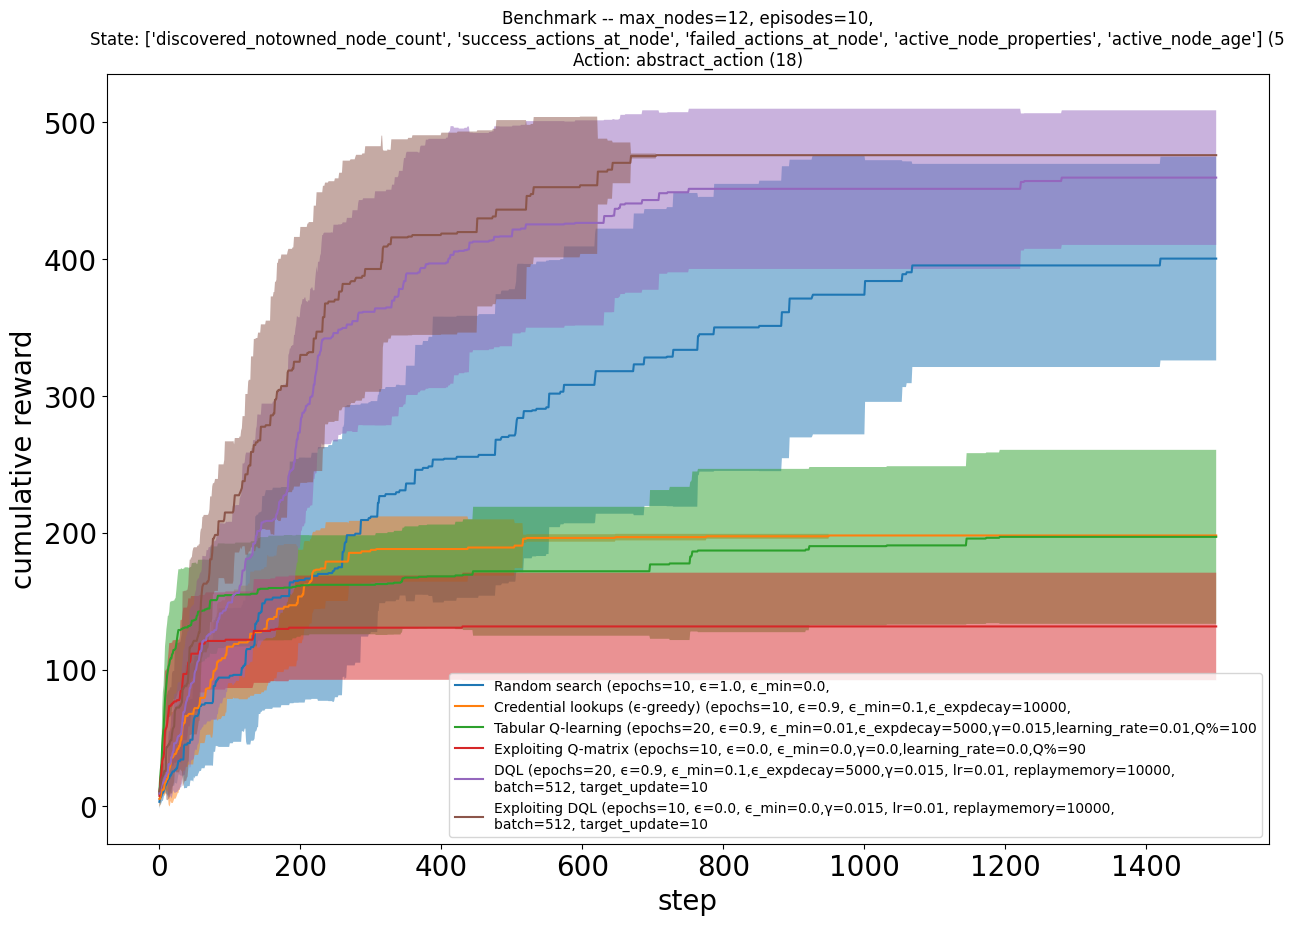

In [25]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
from matplotlib import pyplot as plt

themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})", 
    figsize = (15, 10))

In [2]:
##### dumb all_runs for further usage

os.makedirs(log_dir, exist_ok=True)
with open(os.path.join(log_dir, "all_runs.pkl"), "wb") as f:
    pkl.dump(all_runs, f)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_256913/429946747.py", line 5, in <module>
    pkl.dump(all_runs, f)
NameError: name 'all_runs' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 859, in structured_traceb

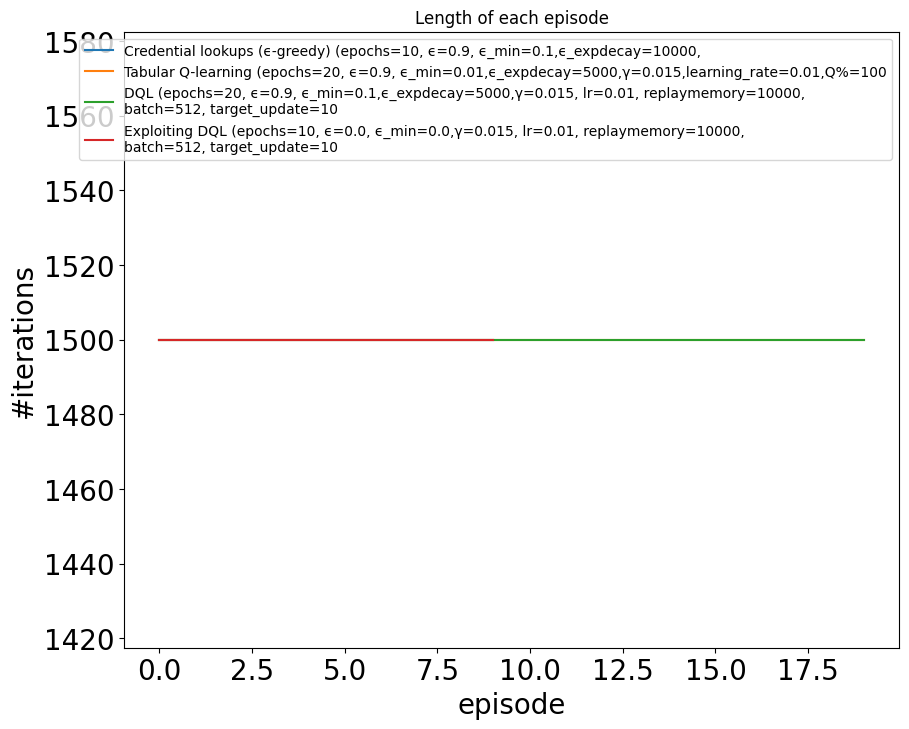

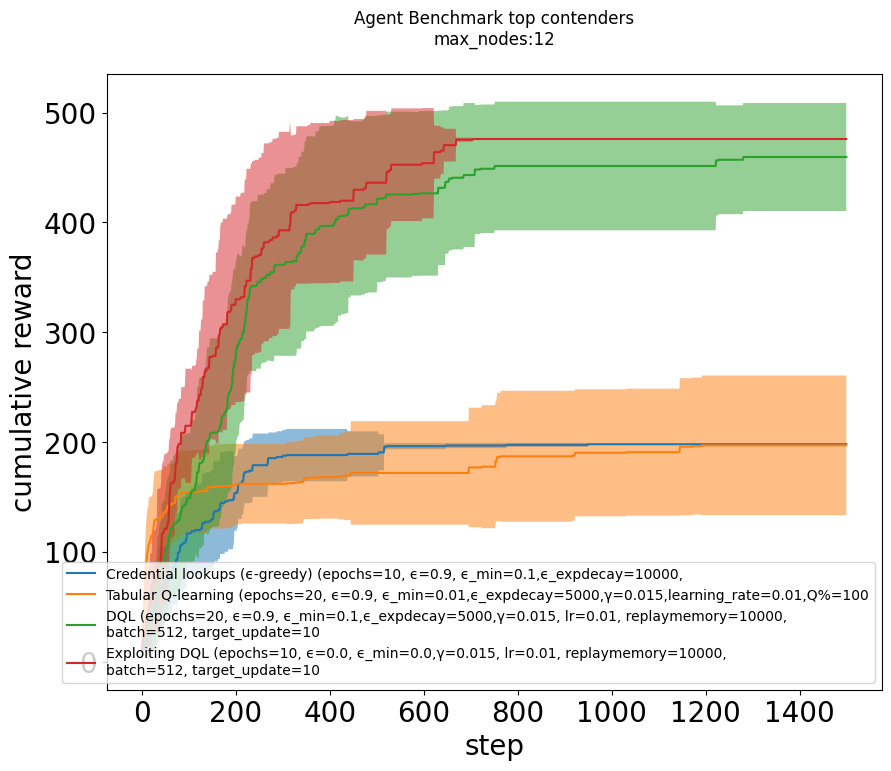

In [26]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

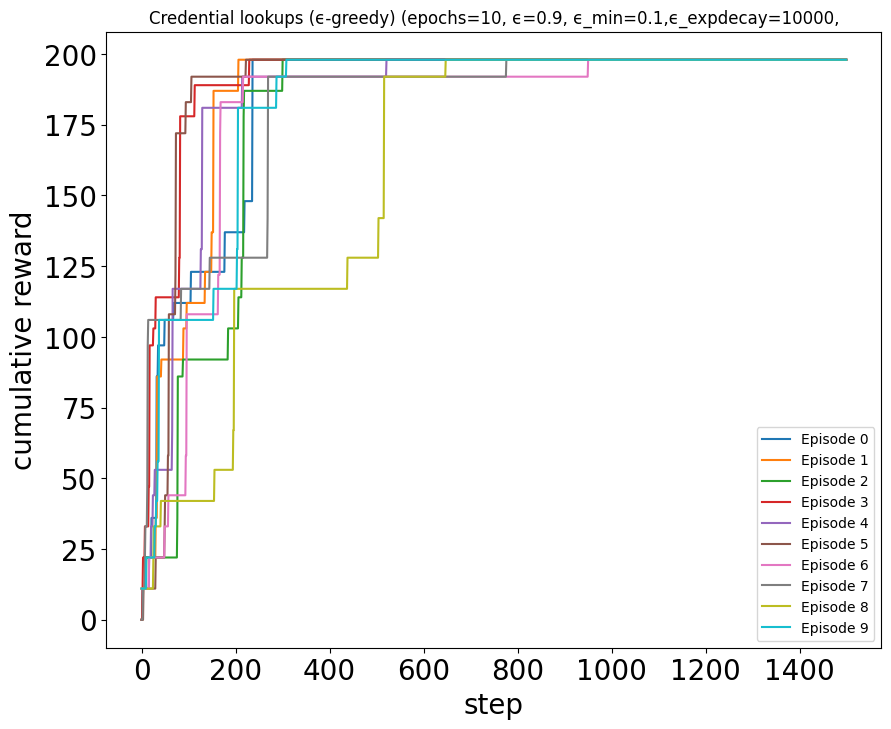

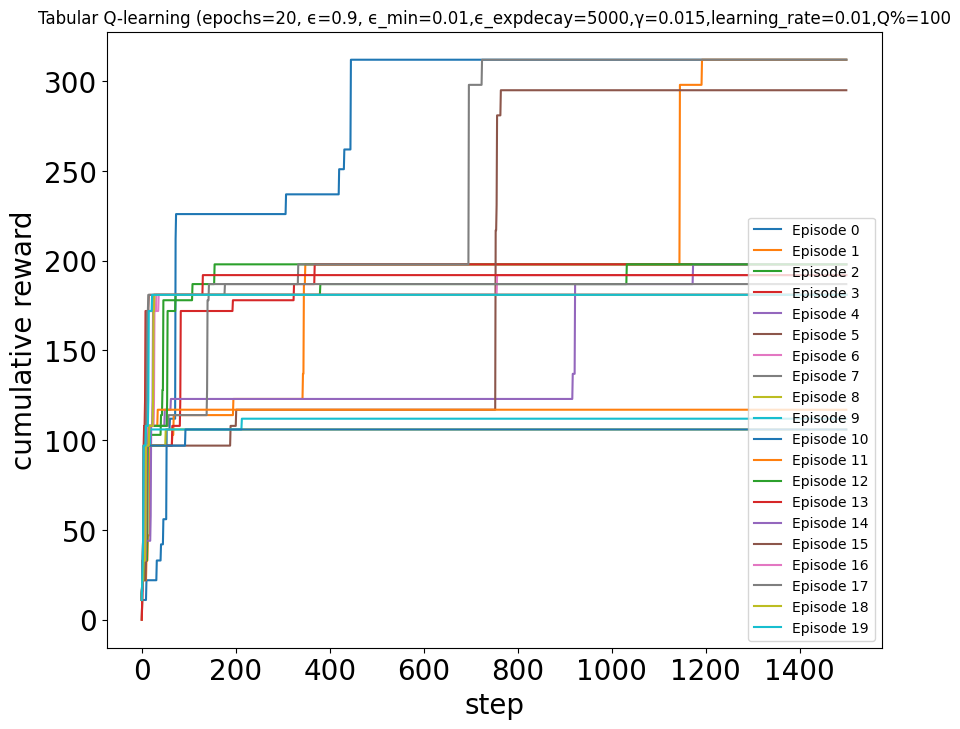

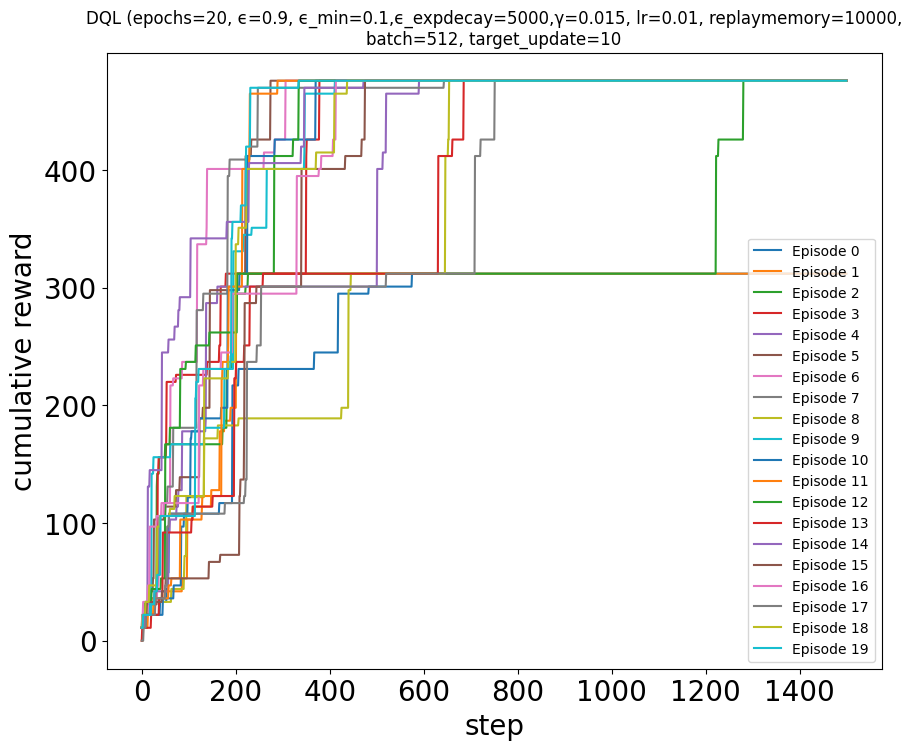

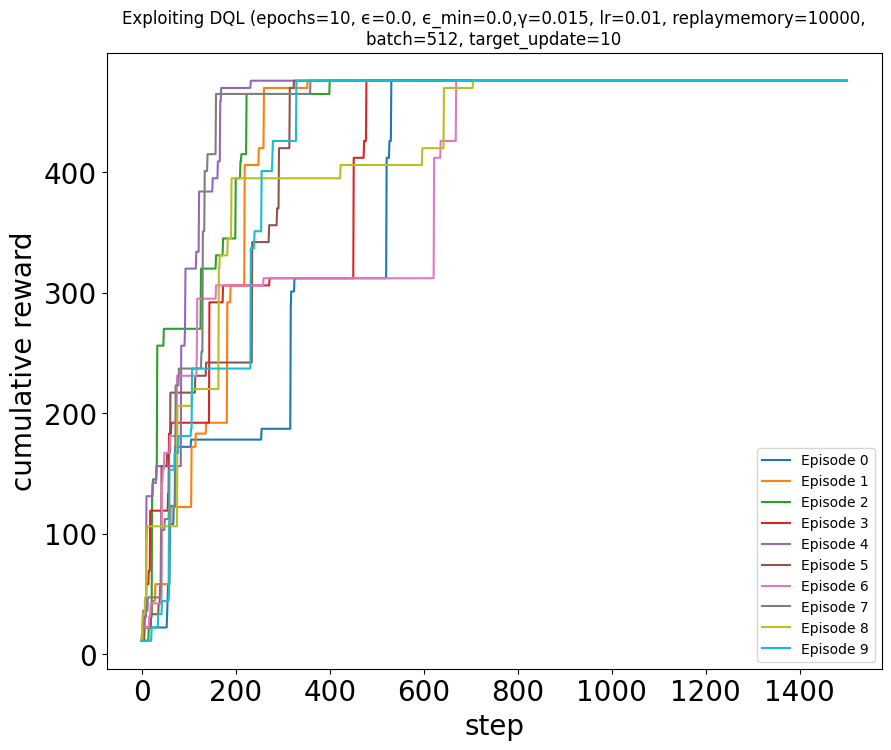

In [27]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)